In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [15]:
rain_gauge = pd.read_csv(r'Datasets\Data_gov_Station_10_years.csv')
ERA5_Land = pd.read_csv(r'C:\Users\userAdmin\Desktop\Data comparison\Datasets\ERA5_Land_10yrs_combined.csv')
ERA5_Reanalysis = pd.read_csv(r'C:\Users\userAdmin\Desktop\Data comparison\Datasets\ERA5_Reanalysis_10yrs_combined.csv')
IMERG = pd.read_csv(r'Datasets\IMERG_Station_10years.csv')
NEA = pd.read_csv(r'Datasets\NEA_Stations_ALL_years.csv')
CMORPH = pd.read_csv(r'Datasets\CMORPH_10yrs.csv')

rain_gauge["Datetime"] = pd.to_datetime(rain_gauge["Datetime"],format='%d/%m/%Y %H:%M')
ERA5_Land["Datetime"] = pd.to_datetime(ERA5_Land["Datetime"])
ERA5_Reanalysis["Datetime"] = pd.to_datetime(ERA5_Reanalysis["Datetime"])
IMERG["Datetime"] = pd.to_datetime(IMERG["Date"],format='%d/%m/%Y %H:%M')
NEA["Datetime"] = pd.to_datetime(NEA["Date"],format='%d/%m/%Y')
CMORPH["Datetime"] = pd.to_datetime(CMORPH["Datetime"])

# Define the start and end dates for the filtering
start_date = '2014-01-01'
end_date = '2023-12-31'

# Filter the dataframes
rain_gauge_filtered = rain_gauge[(rain_gauge["Datetime"] >= start_date) & (rain_gauge["Datetime"] <= end_date)]
ERA5_Land_filtered = ERA5_Land[(ERA5_Land["Datetime"] >= start_date) & (ERA5_Land["Datetime"] <= end_date)]
ERA5_Reanalysis_filtered = ERA5_Reanalysis[(ERA5_Reanalysis["Datetime"] >= start_date) & (ERA5_Reanalysis["Datetime"] <= end_date)]
IMERG_filtered = IMERG[(IMERG["Datetime"] >= start_date) & (IMERG["Datetime"] <= end_date)]
NEA_filtered = NEA[(NEA["Datetime"] >= start_date) & (NEA["Datetime"] <= end_date)]
NEA_filtered['Tengah'] = pd.to_numeric(NEA_filtered['Tengah'], errors='coerce')
NEA_filtered['Changi'] = pd.to_numeric(NEA_filtered['Changi'], errors='coerce')
NEA_filtered['Choa Chu Kang'] = pd.to_numeric(NEA_filtered['Choa Chu Kang'], errors='coerce')
CMORPH_filtered = CMORPH[(CMORPH["Datetime"] >= start_date) & (CMORPH["Datetime"] <= end_date)]
for i in rain_gauge_filtered.columns:
    print(i)
for j in ERA5_Land_filtered.columns:
    print(j)
for k in IMERG_filtered.columns:
    print(k)
for l in NEA_filtered.columns:
    print(l)
for m in CMORPH_filtered.columns:
    print(m)

Datetime
Tengah
Changi
Choa Chu Kang
Datetime
Tengah
Changi
Choa Chu Kang
Date
Season
Choa Chu Kang
Tengah
Changi
Datetime
Date
Changi
Tengah
Choa Chu Kang
Datetime
Datetime
Tengah
Changi
Choa Chu Kang


In [16]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'DJF'  # December, January, February
    elif month in [3, 4, 5]:
        return 'MAM'  # March, April, May
    elif month in [6, 7, 8]:
        return 'JJA'  # June, July, August
    elif month in [9, 10, 11]:
        return 'SON'  # September, October, November
    

rain_gauge_filtered['Season'] = rain_gauge_filtered['Datetime'].apply(get_season)
ERA5_Land_filtered['Season'] = ERA5_Land_filtered['Datetime'].apply(get_season)
ERA5_Reanalysis_filtered['Season'] = ERA5_Reanalysis_filtered['Datetime'].apply(get_season)
IMERG_filtered['Season'] = IMERG_filtered['Datetime'].apply(get_season)
NEA_filtered['Season'] = NEA_filtered['Datetime'].apply(get_season)
CMORPH_filtered['Season'] = CMORPH_filtered['Datetime'].apply(get_season)

# Add Season_Year column to each dataframe
rain_gauge_filtered['Season_Year'] = rain_gauge_filtered['Season'] + '_' + rain_gauge_filtered['Datetime'].dt.year.astype(str)
ERA5_Land_filtered['Season_Year'] = ERA5_Land_filtered['Season'] + '_' + ERA5_Land_filtered['Datetime'].dt.year.astype(str)
ERA5_Reanalysis_filtered['Season_Year'] = ERA5_Reanalysis_filtered['Season'] + '_' + ERA5_Reanalysis_filtered['Datetime'].dt.year.astype(str)
IMERG_filtered['Season_Year'] = IMERG_filtered['Season'] + '_' + IMERG_filtered['Datetime'].dt.year.astype(str)
NEA_filtered['Season_Year'] = NEA_filtered['Season'] + '_' + NEA_filtered['Datetime'].dt.year.astype(str)
CMORPH_filtered['Season_Year'] = CMORPH_filtered['Season'] + '_' + CMORPH_filtered['Datetime'].dt.year.astype(str)

# Extract Datetime and Season alongside each column for all datasets
tengah_rain_gauge_abs = rain_gauge_filtered[["Datetime", "Season_Year", "Tengah"]]
changi_rain_gauge_abs = rain_gauge_filtered[["Datetime", "Season_Year", "Changi"]]
choa_chu_kang_rain_gauge_abs = rain_gauge_filtered[["Datetime", "Season_Year", "Choa Chu Kang"]]


tengah_ERA5_Land_rate = ERA5_Land_filtered[["Datetime", "Season_Year", "Tengah"]]
changi_ERA5_Land_rate = ERA5_Land_filtered[["Datetime", "Season_Year", "Changi"]]
choa_chu_kang_ERA5_Land_rate = ERA5_Land_filtered[["Datetime", "Season_Year", "Choa Chu Kang"]]

tengah_IMERG_rate = IMERG_filtered[["Datetime", "Season_Year", "Tengah"]]
changi_IMERG_rate = IMERG_filtered[["Datetime", "Season_Year", "Changi"]]
choa_chu_kang_IMERG_rate = IMERG_filtered[["Datetime", "Season_Year", "Choa Chu Kang"]]

NEA_tengah_abs = NEA_filtered[["Datetime", "Season_Year", "Tengah"]]
NEA_changi_abs = NEA_filtered[["Datetime", "Season_Year", "Changi"]]
NEA_choa_chu_kang_abs = NEA_filtered[["Datetime", "Season_Year", "Choa Chu Kang"]]





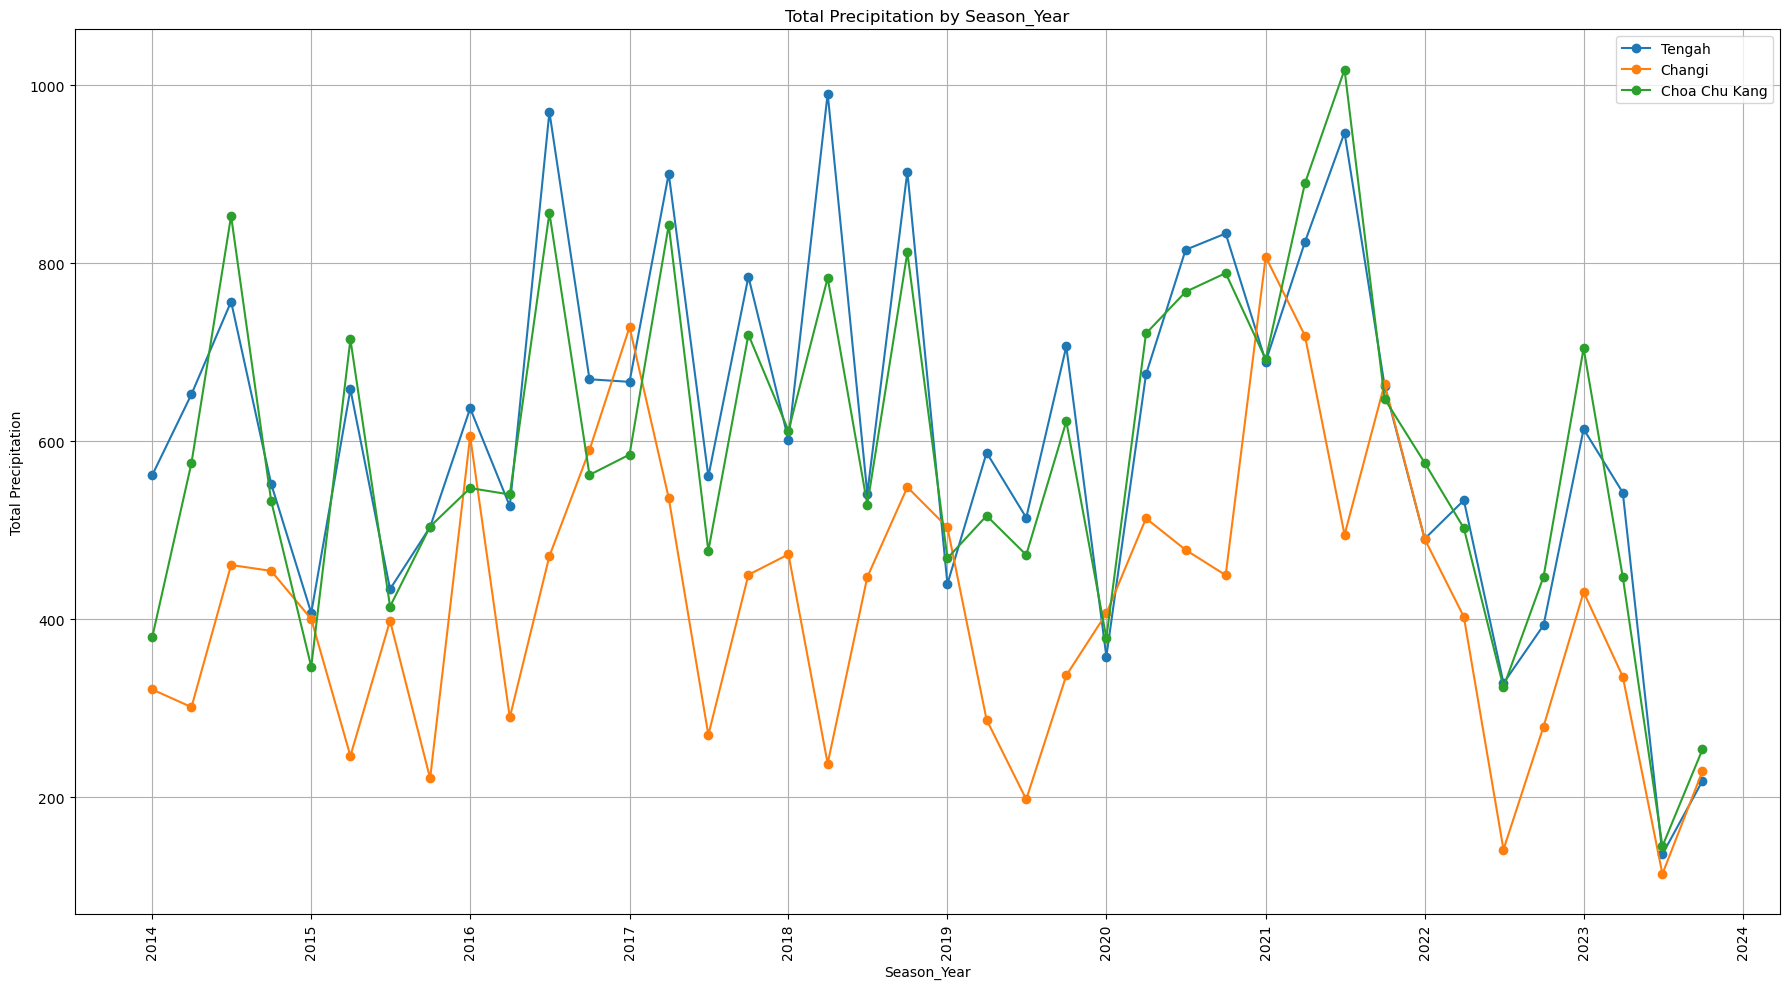

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with NaN values in specific columns
NEA_filtered = NEA_filtered.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])

# Split Season_Year into season and year for proper sorting
def season_to_month(season):
    if season == 'DJF':
        return 1
    elif season == 'MAM':
        return 4
    elif season == 'JJA':
        return 7
    elif season == 'SON':
        return 10

# Create new columns for Year and Season
NEA_filtered['Year'] = NEA_filtered['Season_Year'].str[-4:].astype(int)
NEA_filtered['Season'] = NEA_filtered['Season_Year'].str[:3]
NEA_filtered['Month'] = NEA_filtered['Season'].apply(season_to_month)

# Create a datetime column for proper sorting
NEA_filtered['Datetime'] = pd.to_datetime(NEA_filtered[['Year', 'Month']].assign(DAY=1))

# Group by Datetime and calculate the sum of precipitation for each location
NEA_tengah_sum = NEA_filtered.groupby('Datetime')['Tengah'].sum().reset_index()
NEA_changi_sum = NEA_filtered.groupby('Datetime')['Changi'].sum().reset_index()
NEA_choa_chu_kang_sum = NEA_filtered.groupby('Datetime')['Choa Chu Kang'].sum().reset_index()

# Sort the grouped dataframes by Datetime to ensure correct order
NEA_tengah_sum = NEA_tengah_sum.sort_values(by='Datetime')
NEA_changi_sum = NEA_changi_sum.sort_values(by='Datetime')
NEA_choa_chu_kang_sum = NEA_choa_chu_kang_sum.sort_values(by='Datetime')

# Plot the data
plt.figure(figsize=(18, 10))

# Plot for Tengah
plt.plot(NEA_tengah_sum['Datetime'], NEA_tengah_sum['Tengah'], label='Tengah', marker='o')

# Plot for Changi
plt.plot(NEA_changi_sum['Datetime'], NEA_changi_sum['Changi'], label='Changi', marker='o')

# Plot for Choa Chu Kang
plt.plot(NEA_choa_chu_kang_sum['Datetime'], NEA_choa_chu_kang_sum['Choa Chu Kang'], label='Choa Chu Kang', marker='o')

# Add labels and title
plt.xlabel('Season_Year')
plt.ylabel('Total Precipitation')
plt.title('Total Precipitation by Season_Year')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


0         DJF_2016
1         DJF_2016
2         DJF_2016
3         DJF_2016
4         DJF_2016
            ...   
497398    SON_2021
497399    SON_2021
497400    SON_2021
497401    SON_2021
497402    SON_2021
Name: Season_Year, Length: 467081, dtype: object


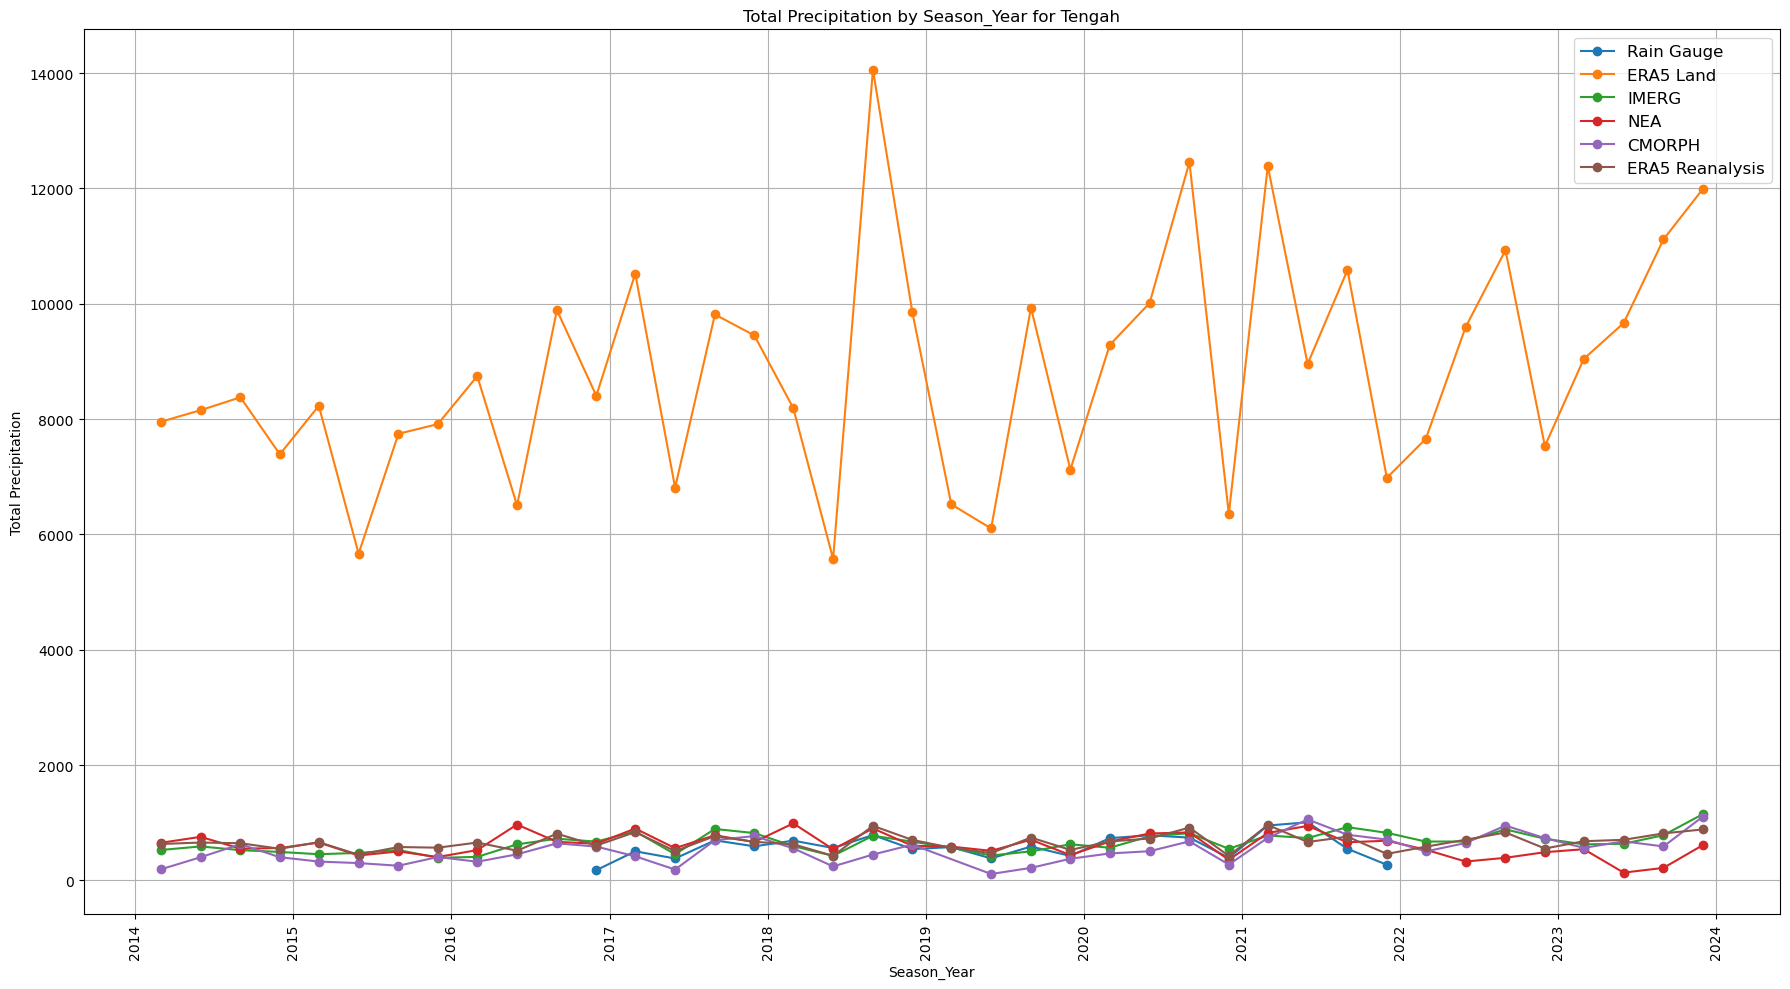

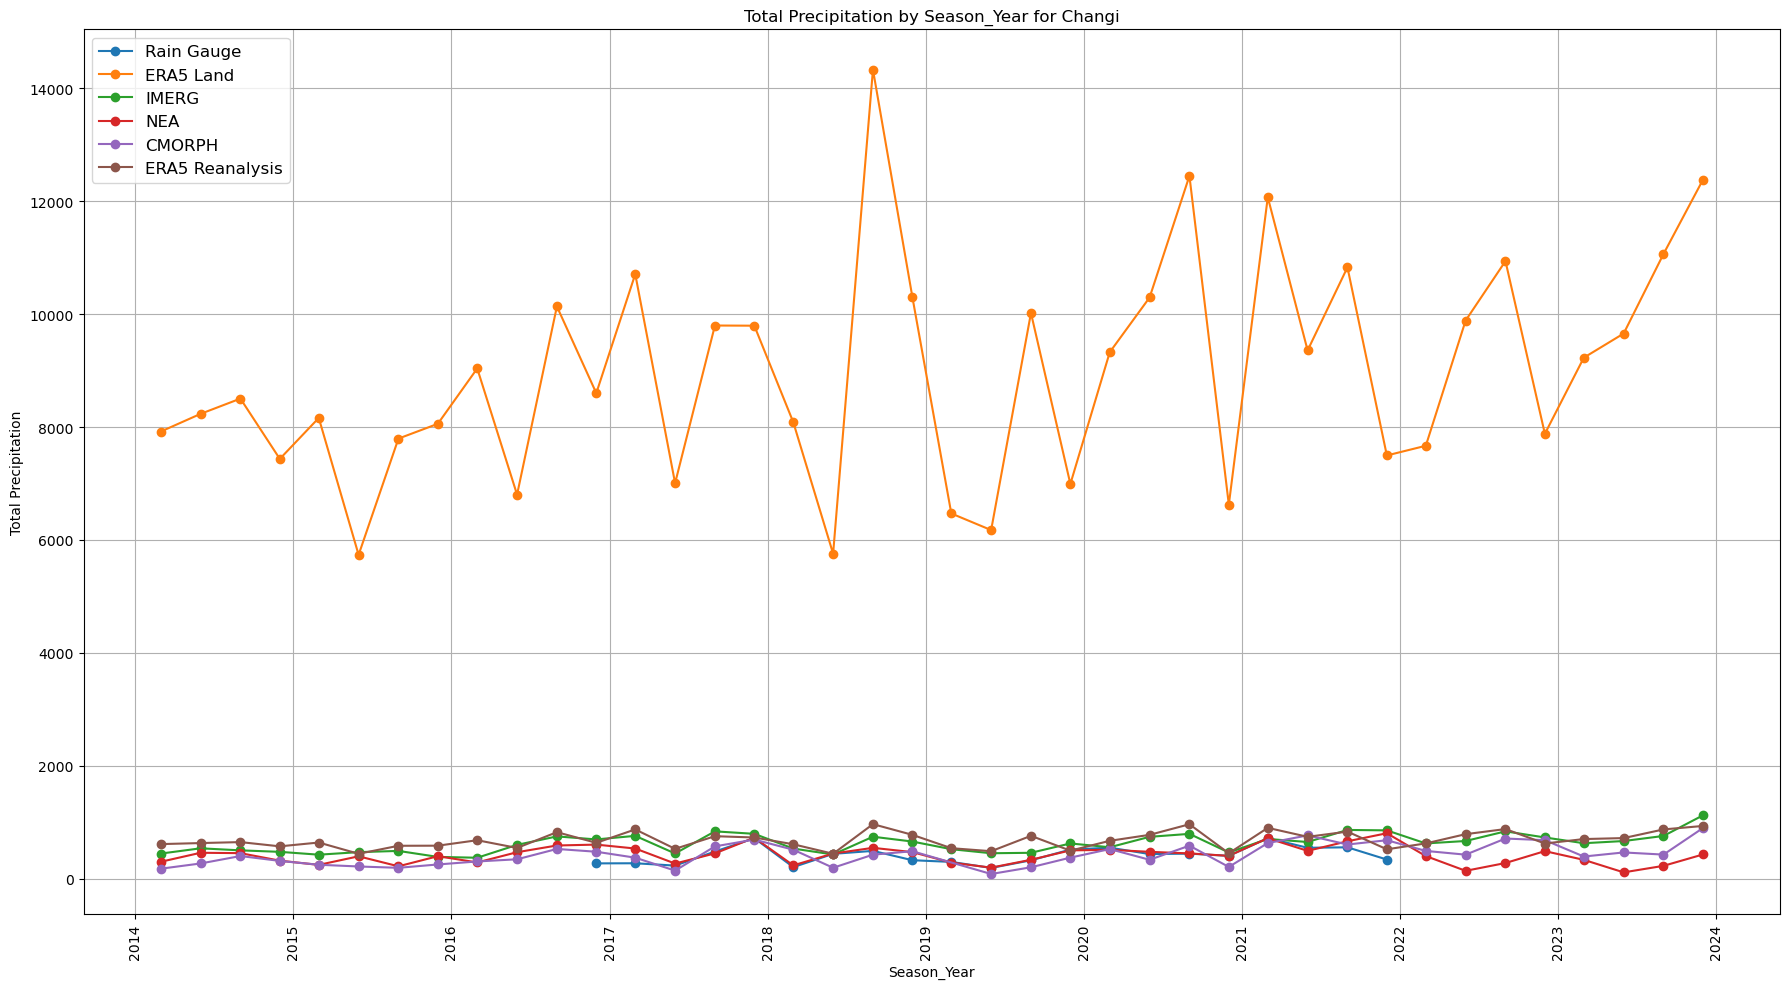

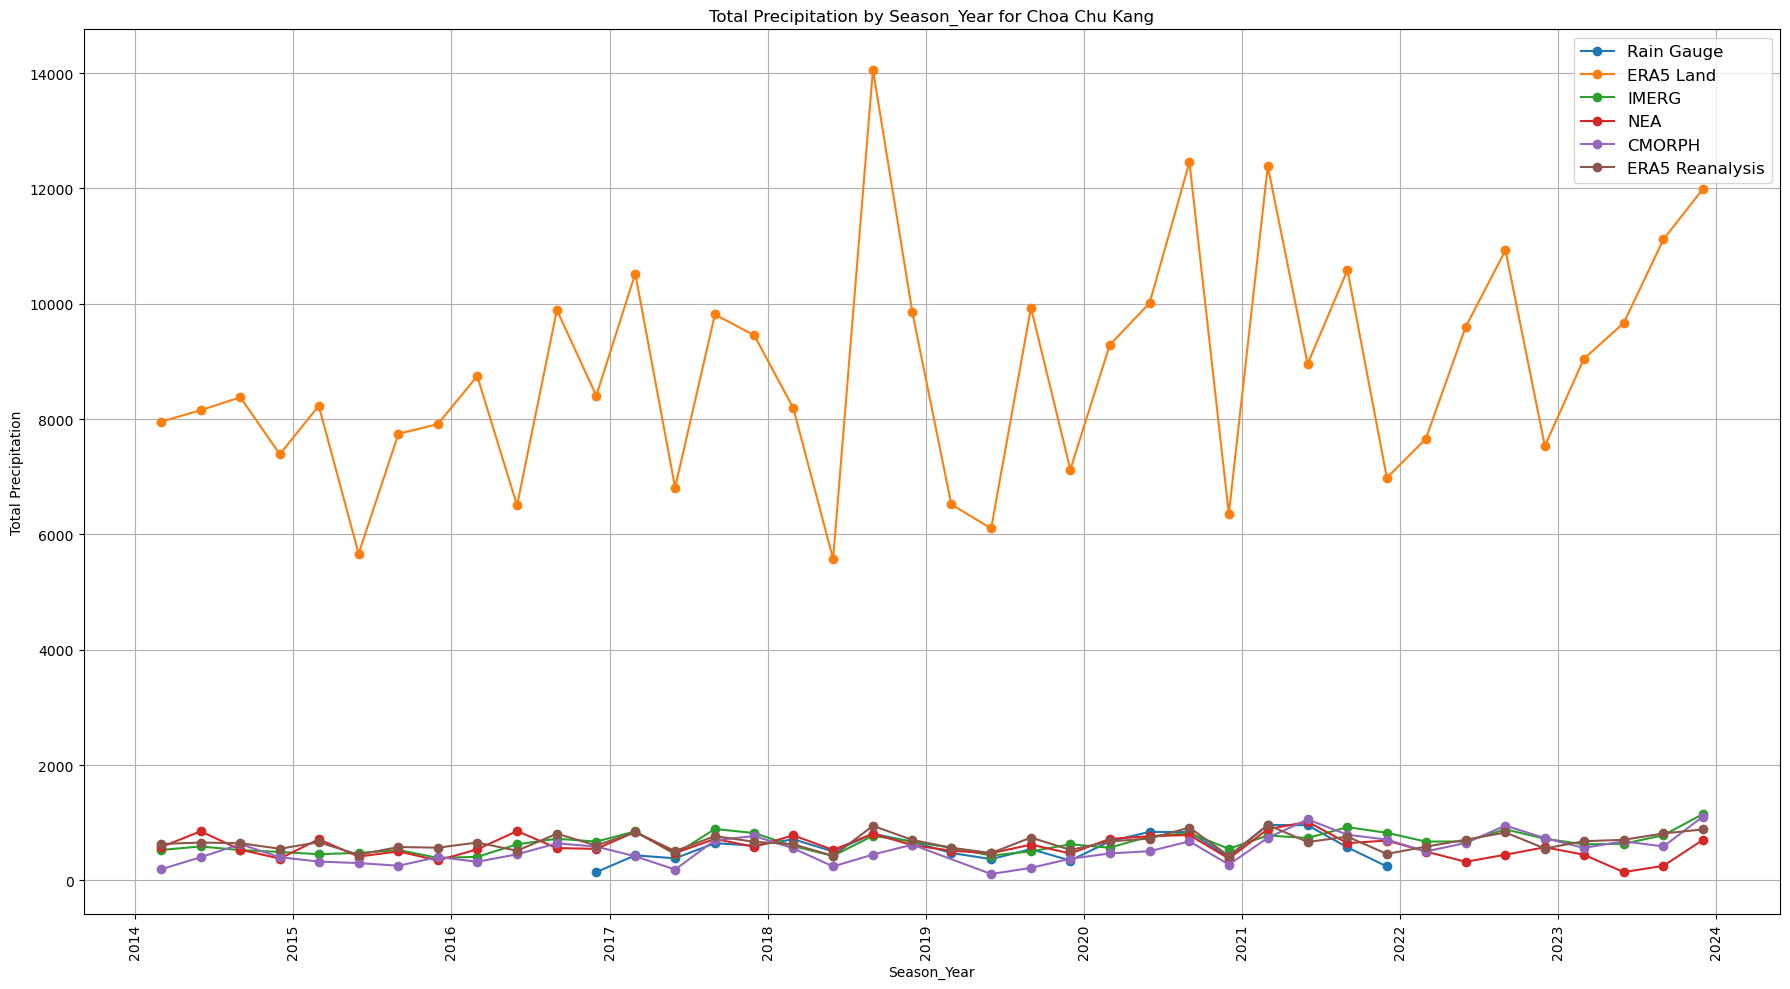

Metrics for Tengah:
           Dataset          MAE  Correlation        KGE
0       Rain Gauge   144.470003     0.662458   0.547516
1        ERA5 Land  8441.150640     0.652087 -16.117390
2            IMERG   132.309501     0.515593   0.507853
3           CMORPH   217.169752     0.531323   0.323489
4  ERA5 Reanalysis    96.862827     0.693227   0.689186

Metrics for Changi:
           Dataset          MAE  Correlation        KGE
0       Rain Gauge    82.205001     0.631813   0.604363
1        ERA5 Land  8807.518937     0.365359 -21.048812
2            IMERG   164.480491     0.732577   0.570997
3           CMORPH   131.916751     0.687117   0.595308
4  ERA5 Reanalysis   233.562473     0.316422   0.199507

Metrics for Choa Chu Kang:
           Dataset          MAE  Correlation        KGE
0       Rain Gauge   115.210002     0.737062   0.496310
1        ERA5 Land  8474.890640     0.662011 -17.026714
2            IMERG   121.445999     0.564663   0.562176
3           CMORPH   188.744251    

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define the season to month mapping function
def season_to_month(season):
    if season == 'DJF':
        return 1
    elif season == 'MAM':
        return 4
    elif season == 'JJA':
        return 7
    elif season == 'SON':
        return 10

# Define a function to process and extract relevant columns for each dataset
def extract_relevant_columns(data, dataset_name):
    data = data.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])
    data['Year'] = data['Season_Year'].str[-4:].astype(int)
    data['Season'] = data['Season_Year'].str[:3]
    data['Month'] = data['Season'].apply(season_to_month)
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    data['Dataset'] = dataset_name
    return data[['Season_Year', 'Tengah', 'Changi', 'Choa Chu Kang', 'Dataset']]

# Extract relevant columns from each dataset
rain_gauge_relevant = extract_relevant_columns(rain_gauge_filtered, 'Rain Gauge')
print(rain_gauge_relevant["Season_Year"])
ERA5_Reanalysis_relavant = extract_relevant_columns(ERA5_Reanalysis_filtered, 'ERA5 Reanalysis')
ERA5_Land_relevant = extract_relevant_columns(ERA5_Land_filtered, 'ERA5 Land')
IMERG_relevant = extract_relevant_columns(IMERG_filtered, 'IMERG')
NEA_relevant = extract_relevant_columns(NEA_filtered, 'NEA')
CMORPH_relevant = extract_relevant_columns(CMORPH_filtered, 'CMORPH')

# Apply the required multipliers
ERA5_Land_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
ERA5_Reanalysis_relavant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
IMERG_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] /= 2
CMORPH_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] /= 2

# Combine all datasets
combined_data = pd.concat([rain_gauge_relevant, ERA5_Land_relevant, IMERG_relevant, NEA_relevant, ERA5_Reanalysis_relavant])

# Group by Season_Year and calculate the sum of precipitation for each location
def group_by_season_year(data):
    grouped = data.groupby('Season_Year').sum(numeric_only=True).reset_index()
    # Convert Season_Year to datetime for sorting
    grouped['Datetime'] = pd.to_datetime(grouped['Season_Year'].str[-4:] + '-' + grouped['Season_Year'].str[:3].map({'DJF': '12', 'MAM': '03', 'JJA': '06', 'SON': '09'}))
    # Sort the grouped data by Datetime for chronological order
    grouped = grouped.sort_values(by='Datetime')
    return grouped

rain_gauge_grouped = group_by_season_year(rain_gauge_relevant)
ERA5_Land_grouped = group_by_season_year(ERA5_Land_relevant)
IMERG_grouped = group_by_season_year(IMERG_relevant)
NEA_grouped = group_by_season_year(NEA_relevant)
CMORPH_grouped = group_by_season_year(CMORPH_relevant)
ERA5_Reanalysis_grouped = group_by_season_year(ERA5_Reanalysis_relavant)

# Function to plot data for a specific location
def plot_location_data(location):
    plt.figure(figsize=(18, 10))
    
    # Plot for each dataset
    for data, name in zip([rain_gauge_grouped, ERA5_Land_grouped, IMERG_grouped, NEA_grouped, CMORPH_grouped, ERA5_Reanalysis_grouped], 
                          ['Rain Gauge', 'ERA5 Land', 'IMERG', 'NEA', 'CMORPH', 'ERA5 Reanalysis']):
        plt.plot(data['Datetime'], data[location], label=name, marker='o')
    
    # Add labels and title
    plt.xlabel('Season_Year')
    plt.ylabel('Total Precipitation')
    plt.title(f'Total Precipitation by Season_Year for {location}')
    plt.legend(fontsize='large')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)
    
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot data for each location
for location in ['Tengah', 'Changi', 'Choa Chu Kang']:
    plot_location_data(location)

# Function to calculate KGE
def calculate_kge(simulated, observed):
    r = np.corrcoef(simulated, observed)[0, 1]
    alpha = np.std(simulated) / np.std(observed)
    beta = np.mean(simulated) / np.mean(observed)
    kge = 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)
    return kge

# Calculate metrics for each location
def calculate_metrics(location):
    results = []
    
    # Align data on the same time index
    combined_grouped = pd.concat([
    rain_gauge_grouped[['Season_Year', location]].set_index('Season_Year'),
    ERA5_Land_grouped[['Season_Year', location]].set_index('Season_Year'),
    IMERG_grouped[['Season_Year', location]].set_index('Season_Year'),
    NEA_grouped[['Season_Year', location]].set_index('Season_Year'),
    CMORPH_grouped[['Season_Year', location]].set_index('Season_Year'),
    ERA5_Reanalysis_grouped[['Season_Year', location]].set_index('Season_Year')
], axis=1, keys=['Rain Gauge', 'ERA5 Land', 'IMERG', 'NEA', 'CMORPH','ERA5 Reanalysis']).dropna()


    for dataset in ['Rain Gauge', 'ERA5 Land', 'IMERG',"CMORPH", 'ERA5 Reanalysis']:
        simulated = combined_grouped[dataset][location]
        observed = combined_grouped['NEA'][location]

        mae = np.mean(np.abs(simulated - observed))
        correlation, _ = pearsonr(simulated, observed)
        kge = calculate_kge(simulated, observed)

        results.append({
            'Dataset': dataset,
            'MAE': mae,
            'Correlation': correlation,
            'KGE': kge
        })

    return pd.DataFrame(results)

# Calculate and print metrics for each location
locations = ['Tengah', 'Changi', 'Choa Chu Kang']
for location in locations:
    metrics = calculate_metrics(location)
    print(f'Metrics for {location}:')
    print(metrics)
    print()


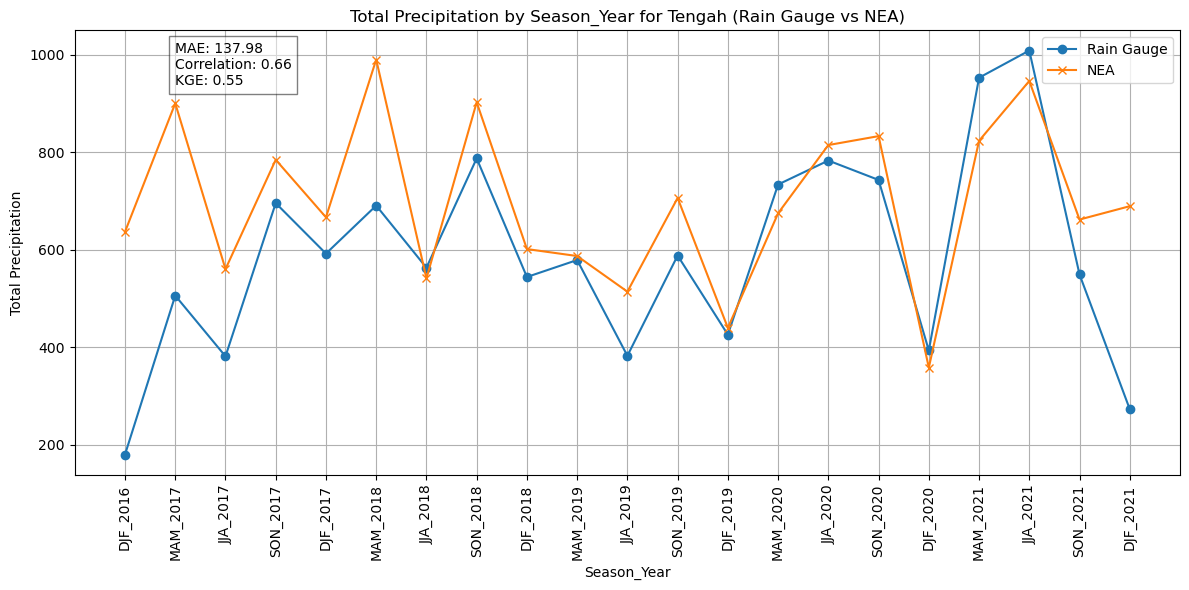

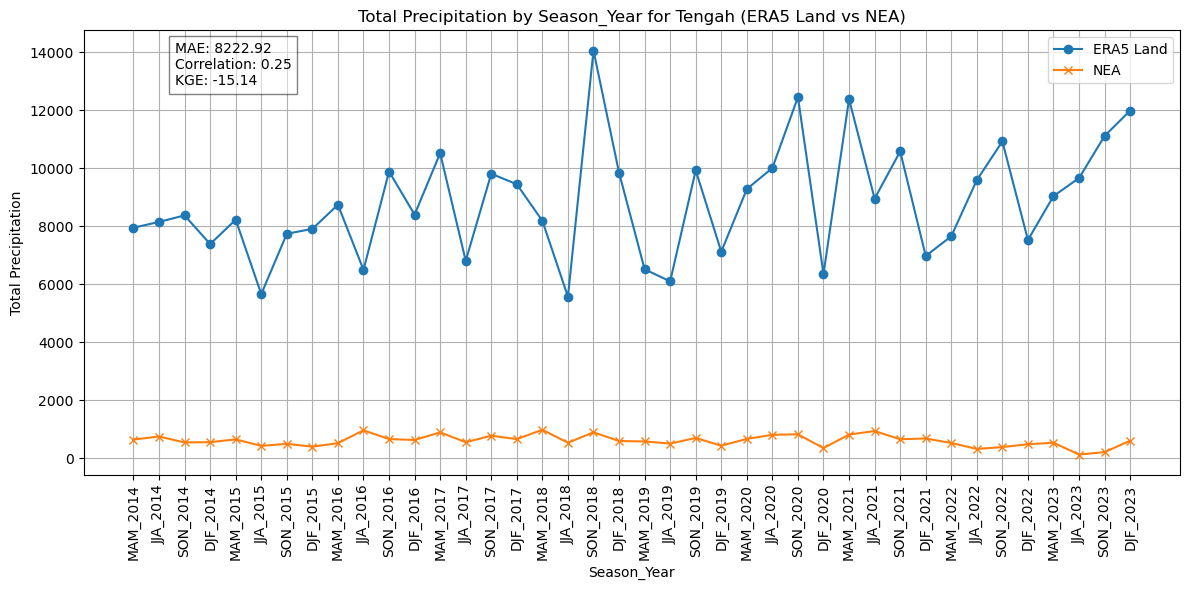

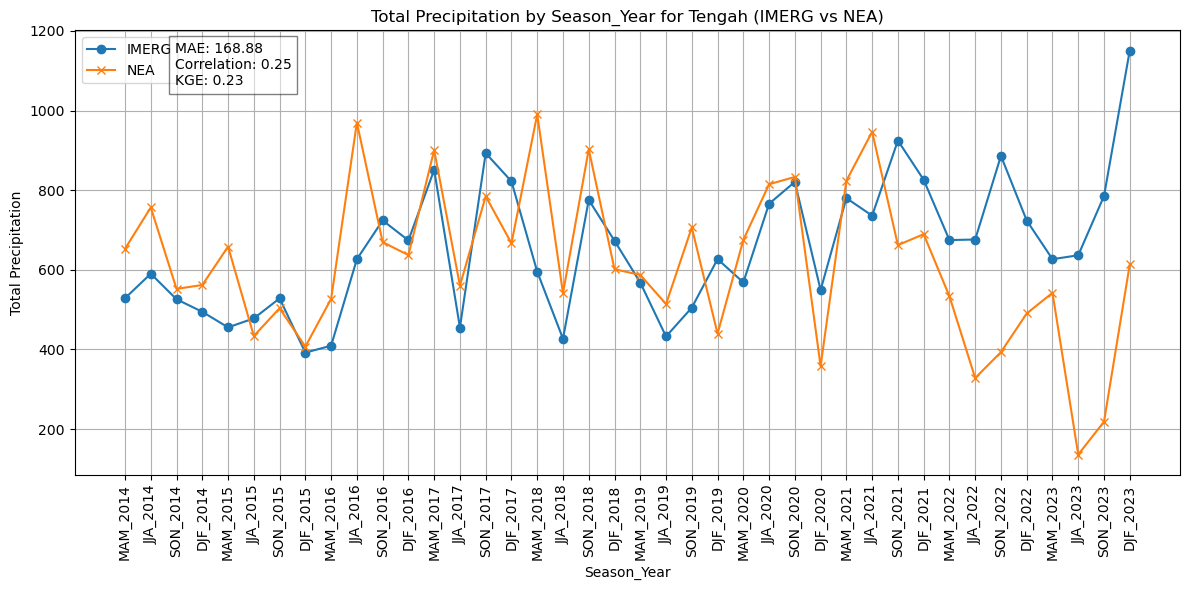

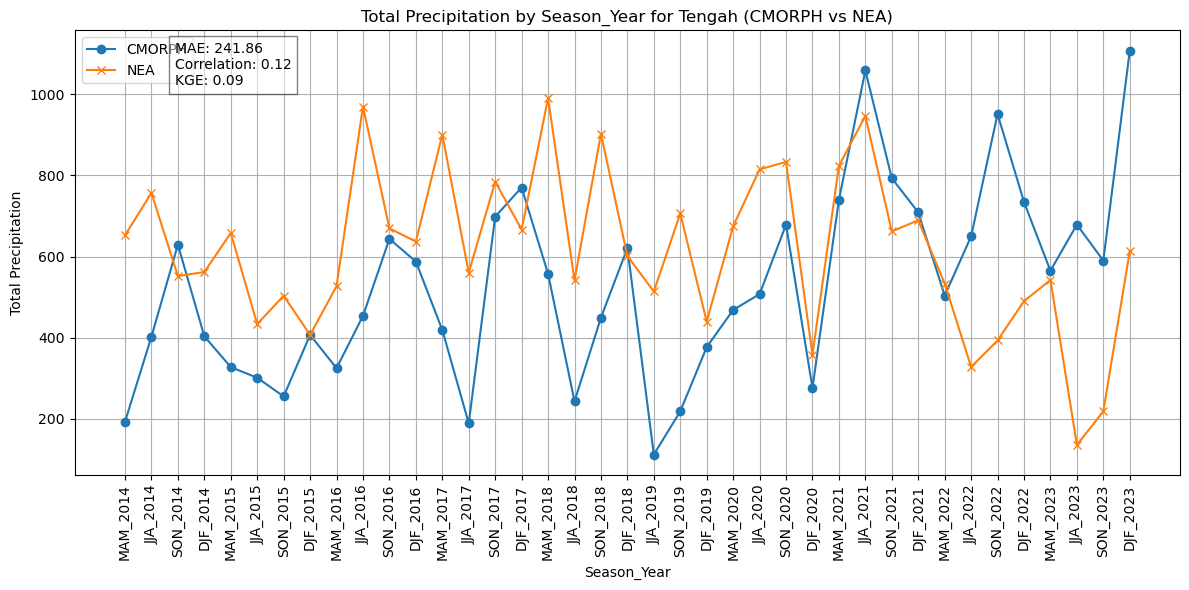

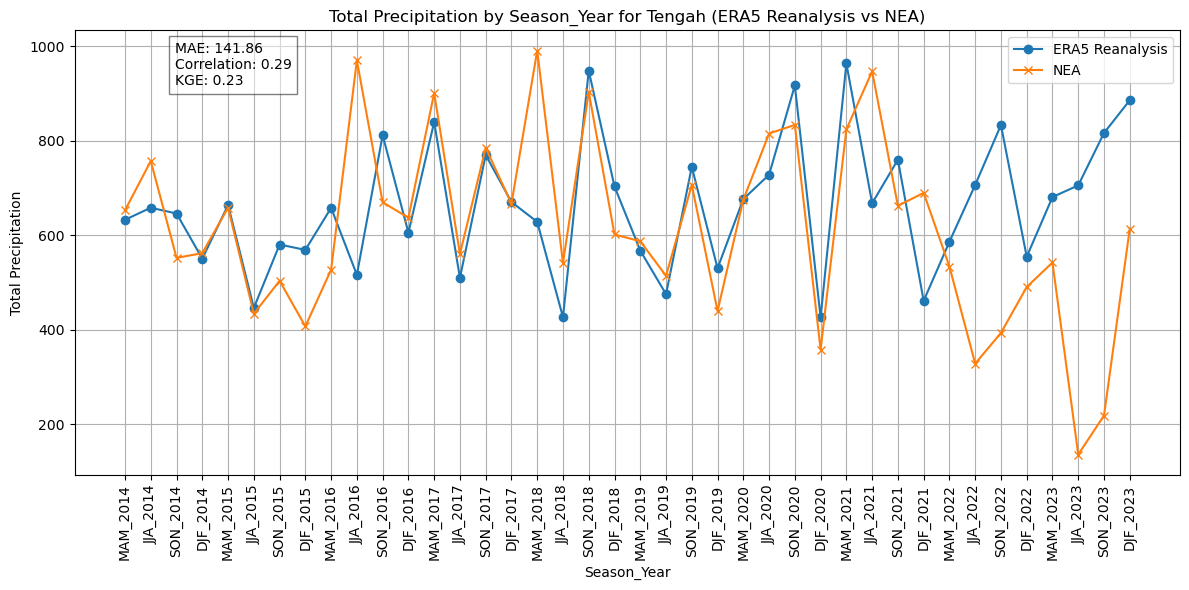

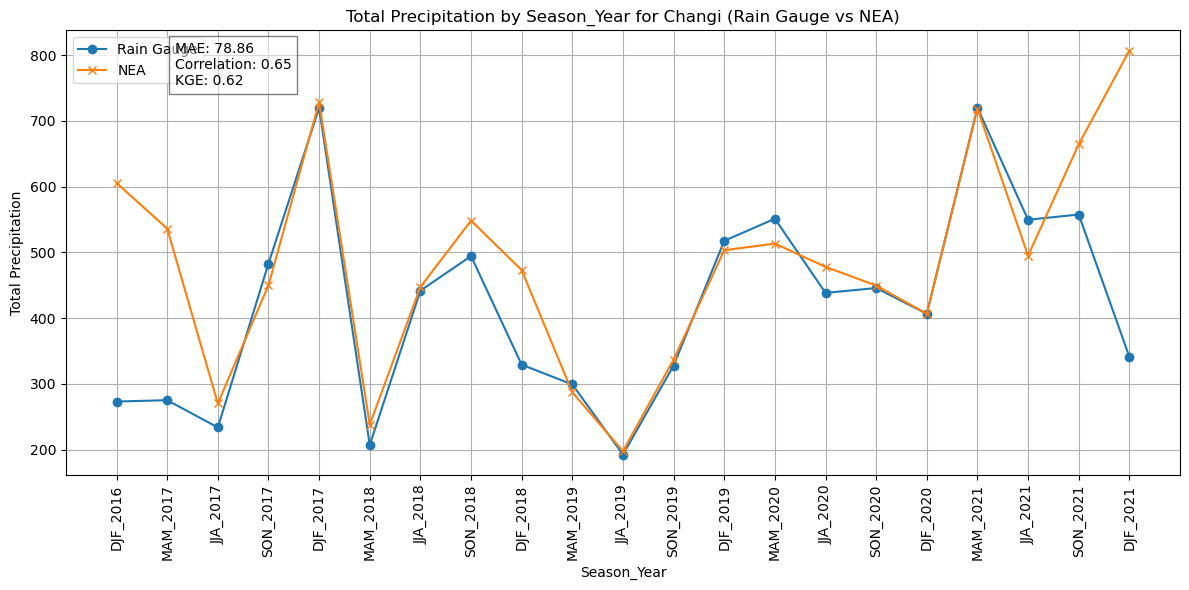

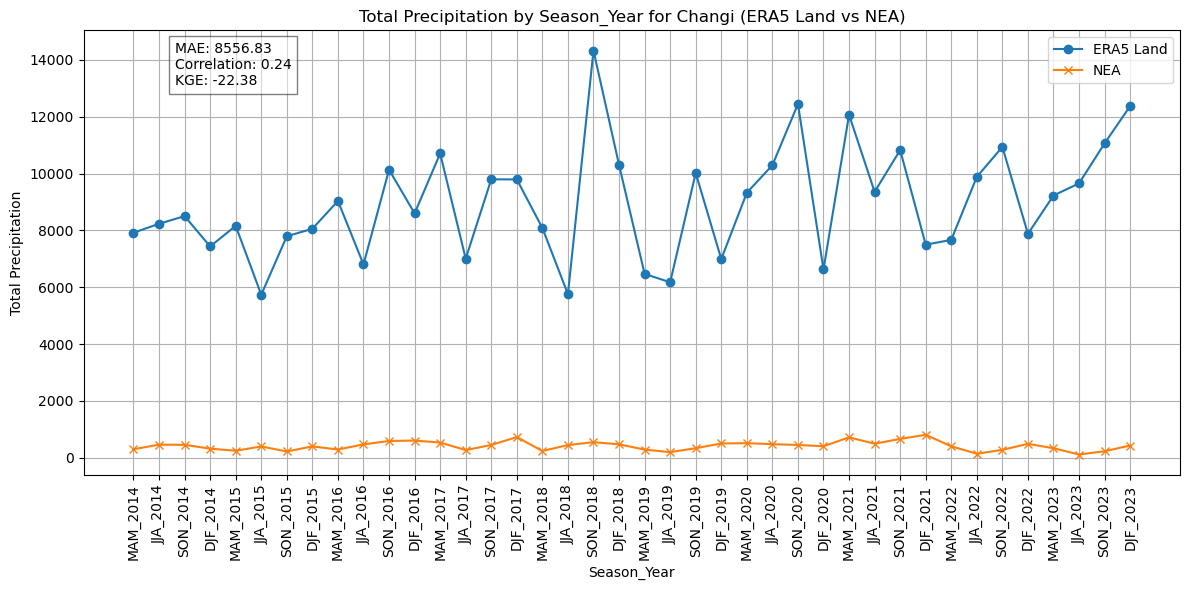

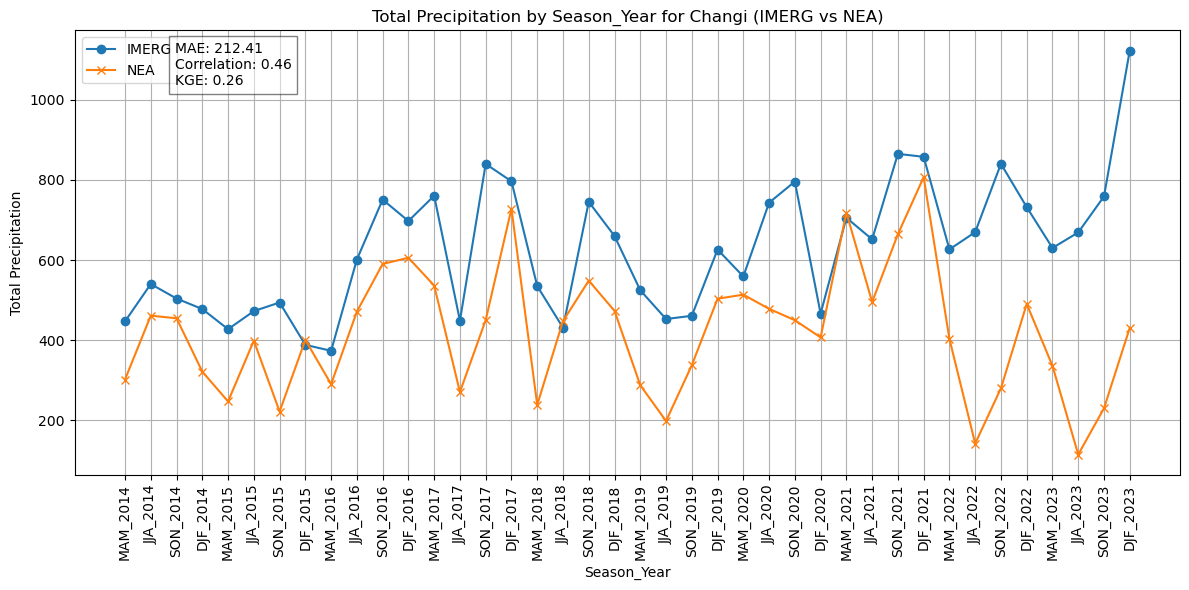

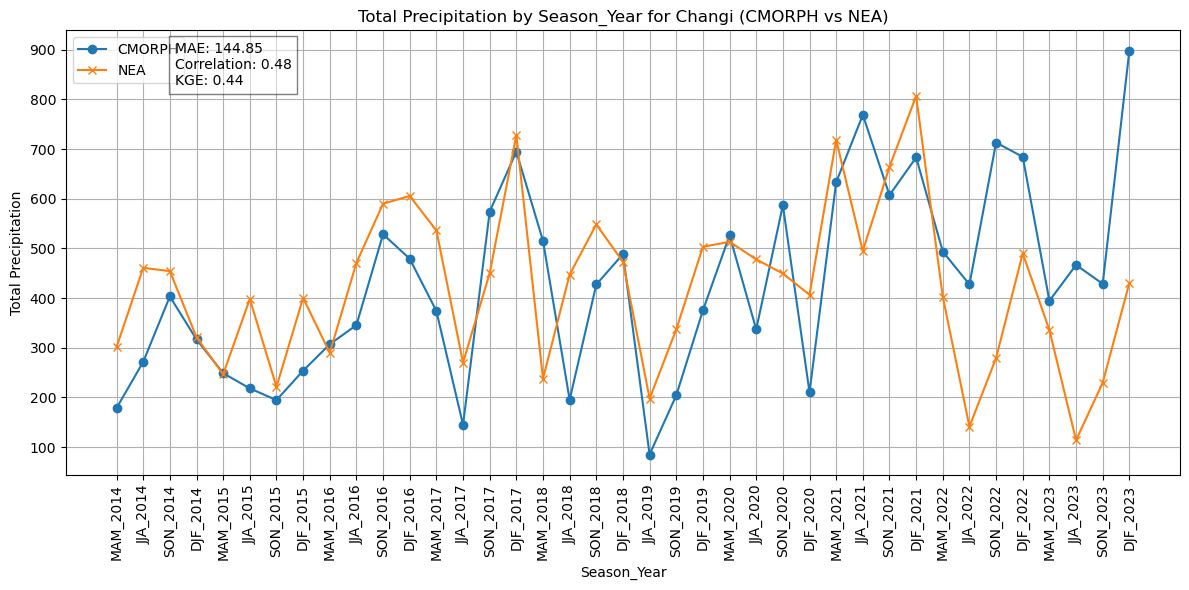

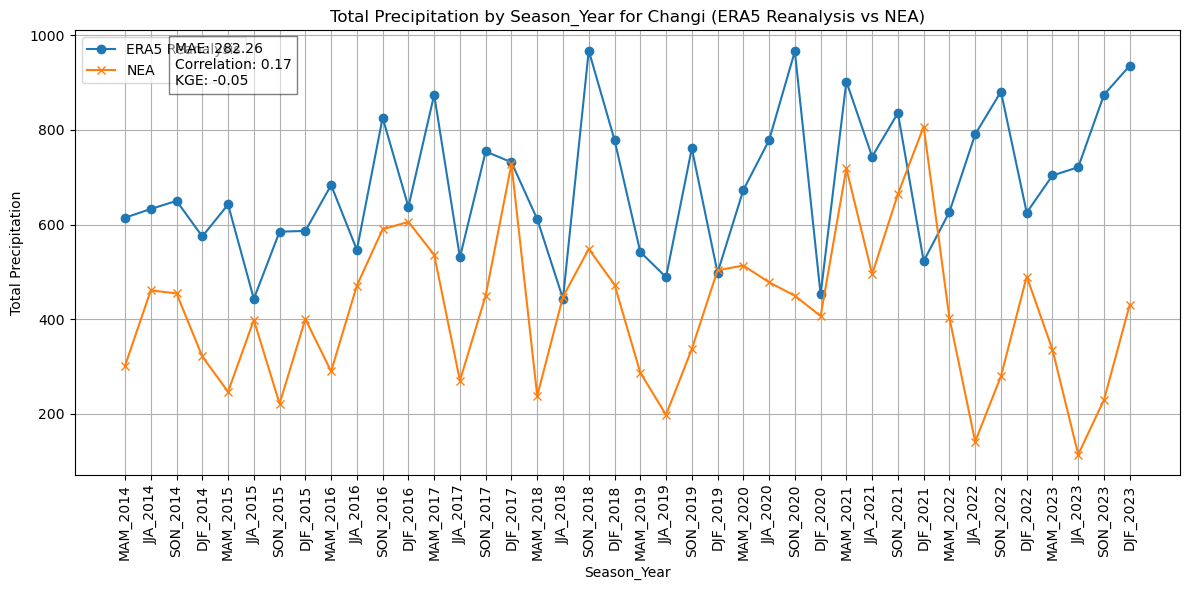

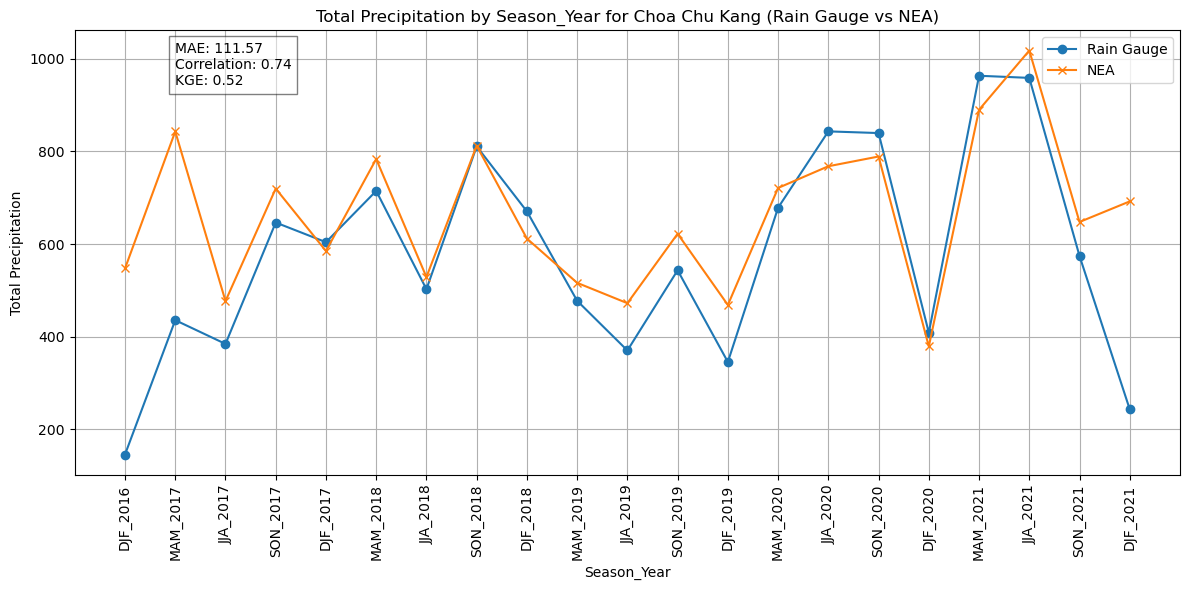

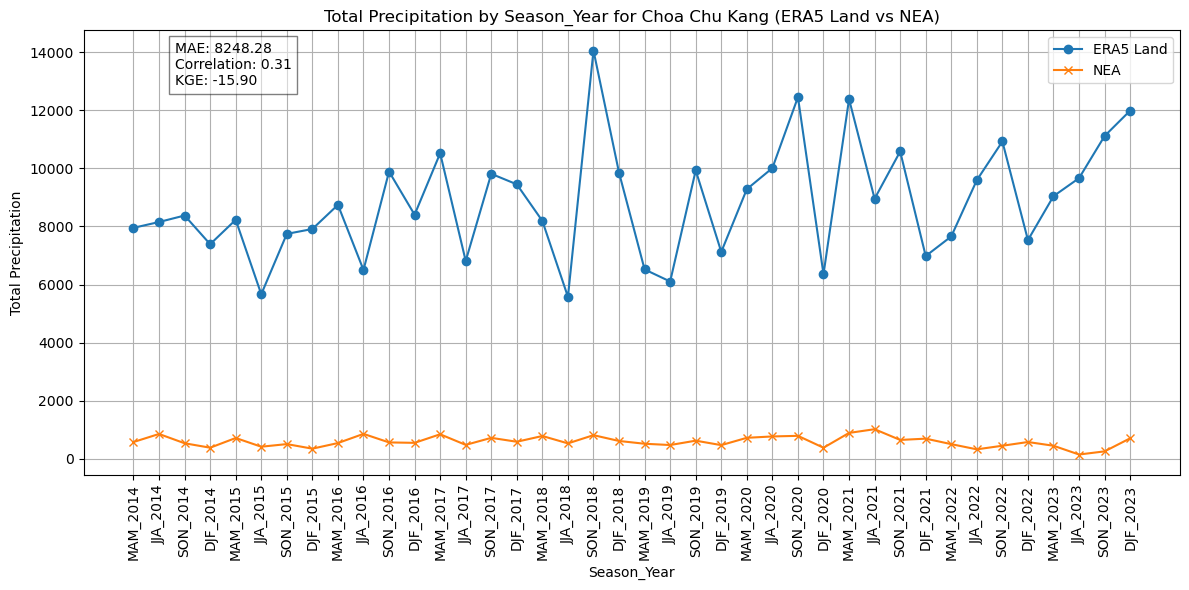

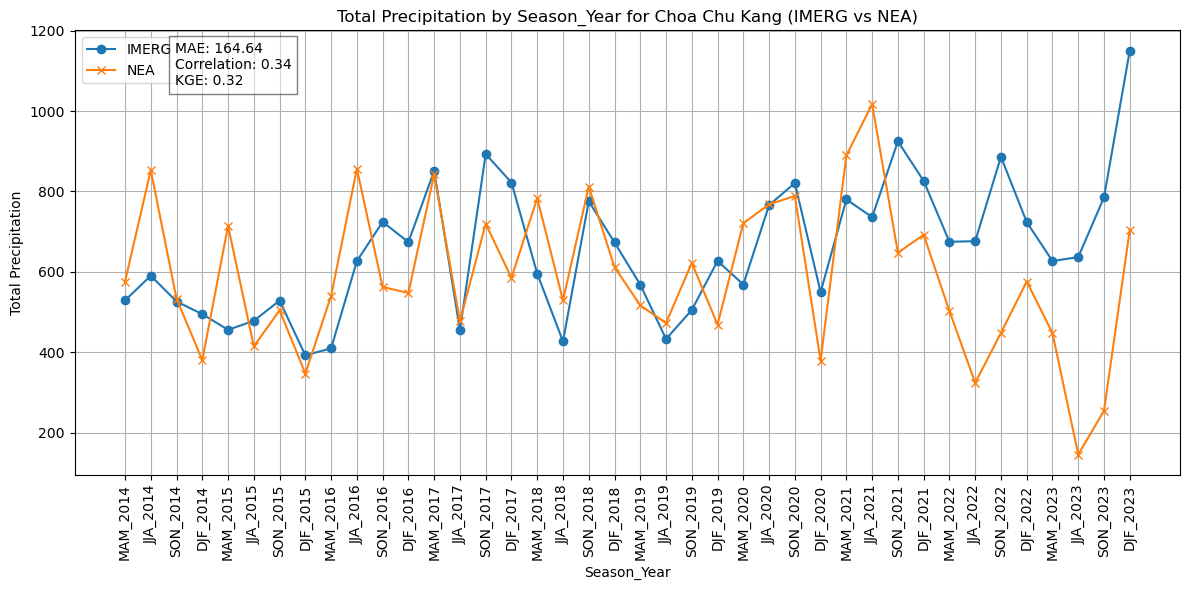

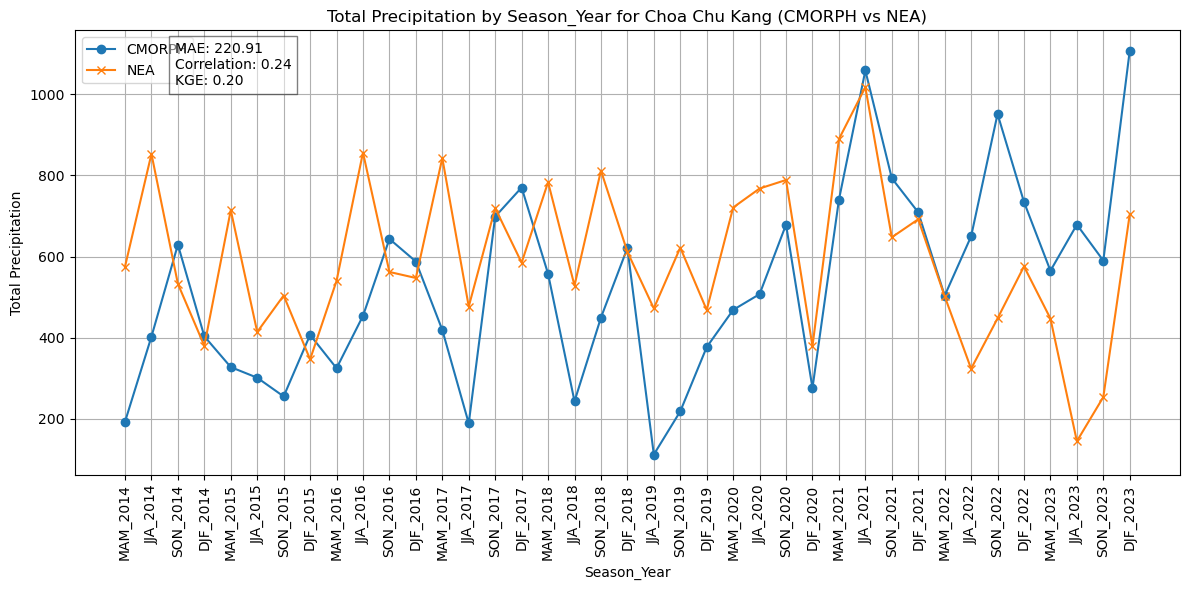

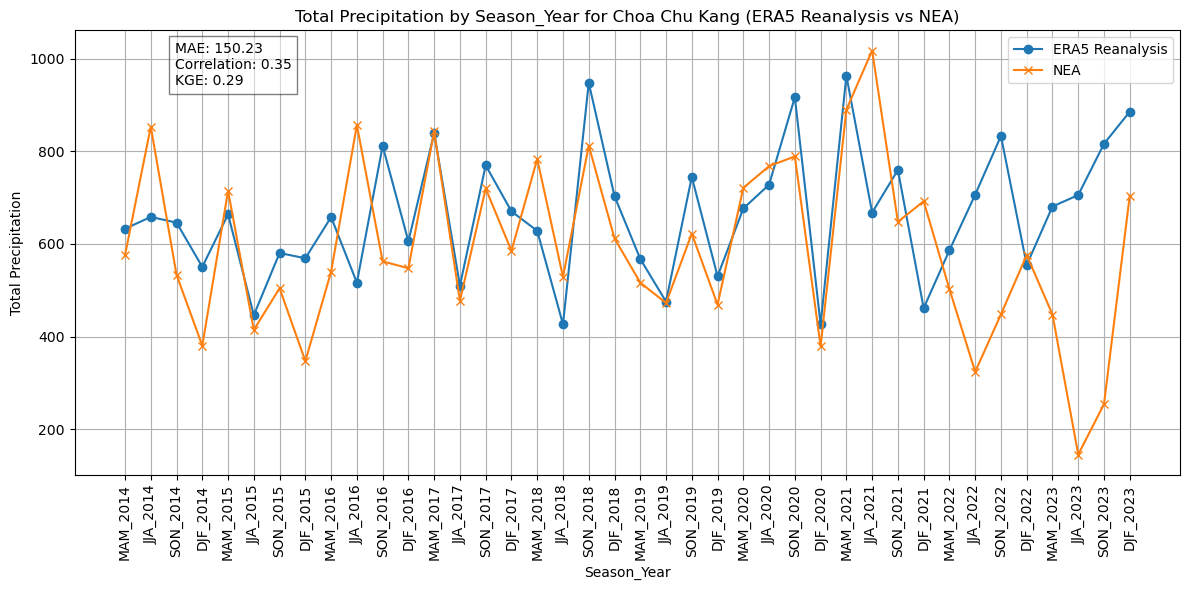

                               Correlation    KGE      MAE
Location      Dataset                                     
Changi        CMORPH                  0.48   0.44   144.85
              ERA5 Land               0.24 -22.38  8556.83
              ERA5 Reanalysis         0.17  -0.05   282.26
              IMERG                   0.46   0.26   212.41
              Rain Gauge              0.65   0.62    78.86
Choa Chu Kang CMORPH                  0.24   0.20   220.91
              ERA5 Land               0.31 -15.90  8248.28
              ERA5 Reanalysis         0.35   0.29   150.23
              IMERG                   0.34   0.32   164.64
              Rain Gauge              0.74   0.52   111.57
Tengah        CMORPH                  0.12   0.09   241.86
              ERA5 Land               0.25 -15.14  8222.92
              ERA5 Reanalysis         0.29   0.23   141.86
              IMERG                   0.25   0.23   168.88
              Rain Gauge              0.66   0.55   137.

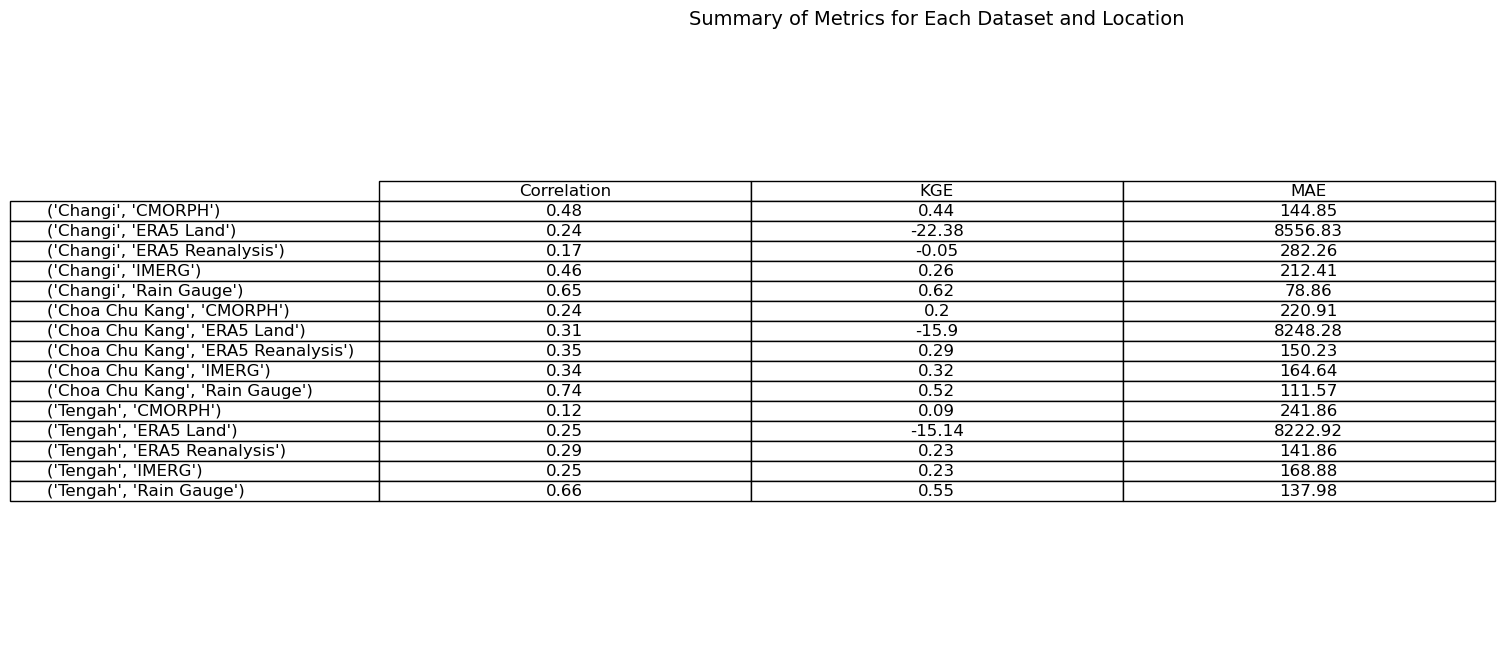

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define the season to month mapping function
def season_to_month(season):
    return {'DJF': 1, 'MAM': 4, 'JJA': 7, 'SON': 10}.get(season, 1)

# Define a function to process and extract relevant columns for each dataset
def extract_relevant_columns(data, dataset_name):
    data = data.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])
    data['Year'] = data['Season_Year'].str[-4:].astype(int)
    data['Season'] = data['Season_Year'].str[:3]
    data['Month'] = data['Season'].apply(season_to_month)
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    data['Dataset'] = dataset_name
    return data[['Season_Year', 'Tengah', 'Changi', 'Choa Chu Kang', 'Dataset']]

# Extract relevant columns from each dataset
rain_gauge_relevant = extract_relevant_columns(rain_gauge_filtered, 'Rain Gauge')
ERA5_Reanalysis_relevant = extract_relevant_columns(ERA5_Reanalysis_filtered, 'ERA5 Reanalysis')
ERA5_Land_relevant = extract_relevant_columns(ERA5_Land_filtered, 'ERA5 Land')
IMERG_relevant = extract_relevant_columns(IMERG_filtered, 'IMERG')
NEA_relevant = extract_relevant_columns(NEA_filtered, 'NEA')
CMORPH_relevant = extract_relevant_columns(CMORPH_filtered, 'CMORPH')

# Apply the required multipliers
ERA5_Land_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
ERA5_Reanalysis_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
IMERG_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] /= 2
CMORPH_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] /= 2

# Combine all datasets
combined_data = pd.concat([rain_gauge_relevant, ERA5_Land_relevant, IMERG_relevant, NEA_relevant, ERA5_Reanalysis_relevant, CMORPH_relevant])

# Group by Season_Year and calculate the sum of precipitation for each location
def group_by_season_year(data):
    grouped = data.groupby('Season_Year').sum(numeric_only=True).reset_index()
    # Convert Season_Year to datetime for sorting
    grouped['Datetime'] = pd.to_datetime(grouped['Season_Year'].str[-4:] + '-' + grouped['Season_Year'].str[:3].map({'DJF': '12', 'MAM': '03', 'JJA': '06', 'SON': '09'}))
    # Sort the grouped data by Datetime for chronological order
    grouped = grouped.sort_values(by='Datetime')
    return grouped

rain_gauge_grouped = group_by_season_year(rain_gauge_relevant)
ERA5_Land_grouped = group_by_season_year(ERA5_Land_relevant)
IMERG_grouped = group_by_season_year(IMERG_relevant)
NEA_grouped = group_by_season_year(NEA_relevant)
CMORPH_grouped = group_by_season_year(CMORPH_relevant)
ERA5_Reanalysis_grouped = group_by_season_year(ERA5_Reanalysis_relevant)

# Function to calculate KGE
def calculate_kge(simulated, observed):
    r = np.corrcoef(simulated, observed)[0, 1]
    alpha = np.std(simulated) / np.std(observed)
    beta = np.mean(simulated) / np.mean(observed)
    kge = 1 - np.sqrt((r - 1)**2 + (alpha - 1)**2 + (beta - 1)**2)
    return kge

# Calculate metrics for each dataset
def calculate_metrics(simulated, observed):
    mae = np.mean(np.abs(simulated - observed))
    correlation, _ = pearsonr(simulated, observed)
    kge = calculate_kge(simulated, observed)
    return {'MAE': round(mae, 2), 'Correlation': round(correlation, 2), 'KGE': round(kge, 2)}

# Initialize a DataFrame to store metrics
metrics_df = pd.DataFrame()

# Function to plot individual comparisons between each dataset and NEA for a specific location
def plot_individual_comparisons(location):
    datasets = {
        'Rain Gauge': rain_gauge_grouped,
        'ERA5 Land': ERA5_Land_grouped,
        'IMERG': IMERG_grouped,
        'CMORPH': CMORPH_grouped,
        'ERA5 Reanalysis': ERA5_Reanalysis_grouped
    }
    
    for name, data in datasets.items():
        combined_grouped = pd.concat([data[['Season_Year', location]].set_index('Season_Year'), NEA_grouped[['Season_Year', location]].set_index('Season_Year')], axis=1, keys=[name, 'NEA']).dropna()
        simulated = combined_grouped[name][location]
        observed = combined_grouped['NEA'][location]
        
        metrics = calculate_metrics(simulated, observed)
        metrics['Dataset'] = name
        metrics['Location'] = location
        global metrics_df
        metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics, index=[0])])
        
        plt.figure(figsize=(12, 6))
        plt.plot(combined_grouped.index, simulated, label=name, marker='o')
        plt.plot(combined_grouped.index, observed, label='NEA', marker='x')
        
        plt.xlabel('Season_Year')
        plt.ylabel('Total Precipitation')
        plt.title(f'Total Precipitation by Season_Year for {location} ({name} vs NEA)')
        plt.legend()
        
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.tight_layout()
        
        # Display metrics on the plot
        plt.figtext(0.15, 0.85, f"MAE: {metrics['MAE']:.2f}\nCorrelation: {metrics['Correlation']:.2f}\nKGE: {metrics['KGE']:.2f}", bbox=dict(facecolor='white', alpha=0.5))
        
        plt.show()

# Plot individual comparisons for each location
for location in ['Tengah', 'Changi', 'Choa Chu Kang']:
    plot_individual_comparisons(location)

# Display summary table of metrics
summary_table = metrics_df.pivot_table(index=['Location', 'Dataset'], values=['MAE', 'Correlation', 'KGE'])
print(summary_table)

# Plot summary table as a figure
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=np.round(summary_table.values, 2), colLabels=summary_table.columns, rowLabels=summary_table.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Summary of Metrics for Each Dataset and Location', fontsize=14)
plt.show()


Rain Gauge - DJF Probability of 20mm/h rain: 0.0030
Rain Gauge - MAM Probability of 20mm/h rain: 0.0053
Rain Gauge - JJA Probability of 20mm/h rain: 0.0046
Rain Gauge - SON Probability of 20mm/h rain: 0.0049
ERA5 Land - DJF Probability of 20mm/h rain: 0.0302
ERA5 Land - MAM Probability of 20mm/h rain: 0.0181
ERA5 Land - JJA Probability of 20mm/h rain: 0.0098
ERA5 Land - SON Probability of 20mm/h rain: 0.0303
IMERG - DJF Probability of 20mm/h rain: 0.0000
IMERG - MAM Probability of 20mm/h rain: 0.0001
IMERG - JJA Probability of 20mm/h rain: 0.0002
IMERG - SON Probability of 20mm/h rain: 0.0001
CMORPH - DJF Probability of 20mm/h rain: 0.0014
CMORPH - MAM Probability of 20mm/h rain: 0.0005
CMORPH - JJA Probability of 20mm/h rain: 0.0007
CMORPH - SON Probability of 20mm/h rain: 0.0009
ERA5 Reanalysis - DJF Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - MAM Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - JJA Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - SON Probability of 

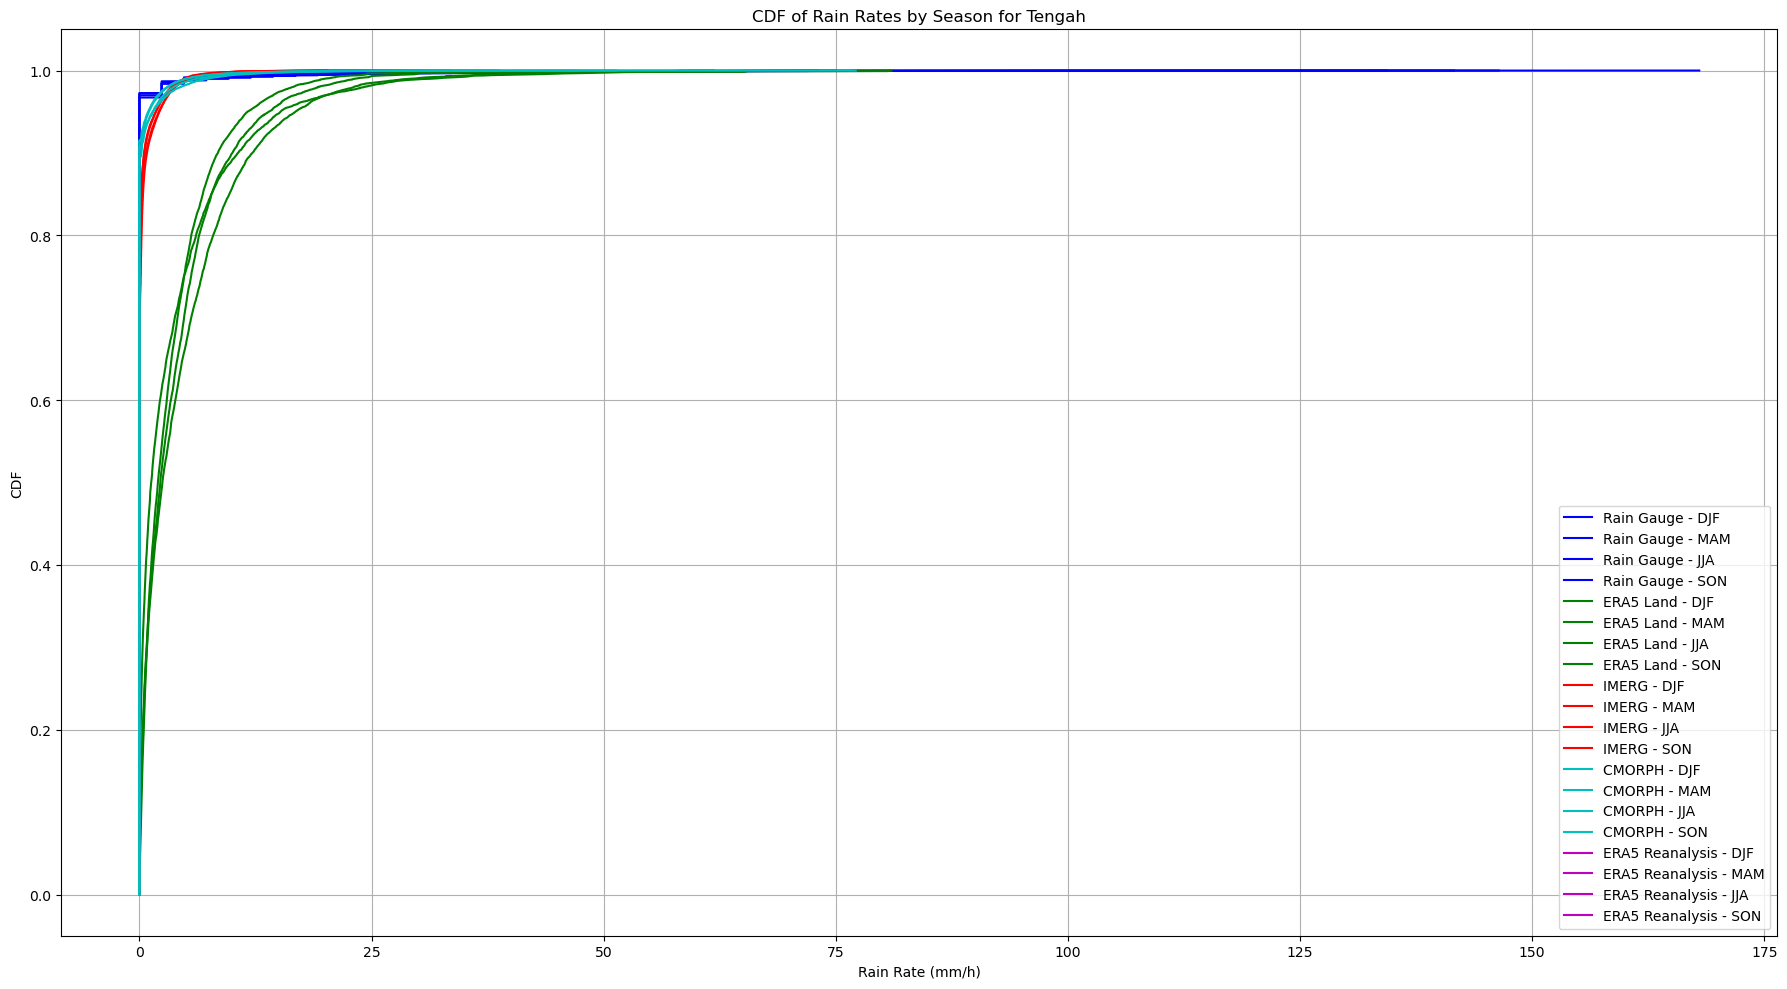

Rain Gauge - DJF Probability of 20mm/h rain: 0.0033
Rain Gauge - MAM Probability of 20mm/h rain: 0.0031
Rain Gauge - JJA Probability of 20mm/h rain: 0.0026
Rain Gauge - SON Probability of 20mm/h rain: 0.0029
ERA5 Land - DJF Probability of 20mm/h rain: 0.0316
ERA5 Land - MAM Probability of 20mm/h rain: 0.0171
ERA5 Land - JJA Probability of 20mm/h rain: 0.0105
ERA5 Land - SON Probability of 20mm/h rain: 0.0307
IMERG - DJF Probability of 20mm/h rain: 0.0001
IMERG - MAM Probability of 20mm/h rain: 0.0001
IMERG - JJA Probability of 20mm/h rain: 0.0002
IMERG - SON Probability of 20mm/h rain: 0.0002
CMORPH - DJF Probability of 20mm/h rain: 0.0006
CMORPH - MAM Probability of 20mm/h rain: 0.0002
CMORPH - JJA Probability of 20mm/h rain: 0.0001
CMORPH - SON Probability of 20mm/h rain: 0.0003
ERA5 Reanalysis - DJF Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - MAM Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - JJA Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - SON Probability of 

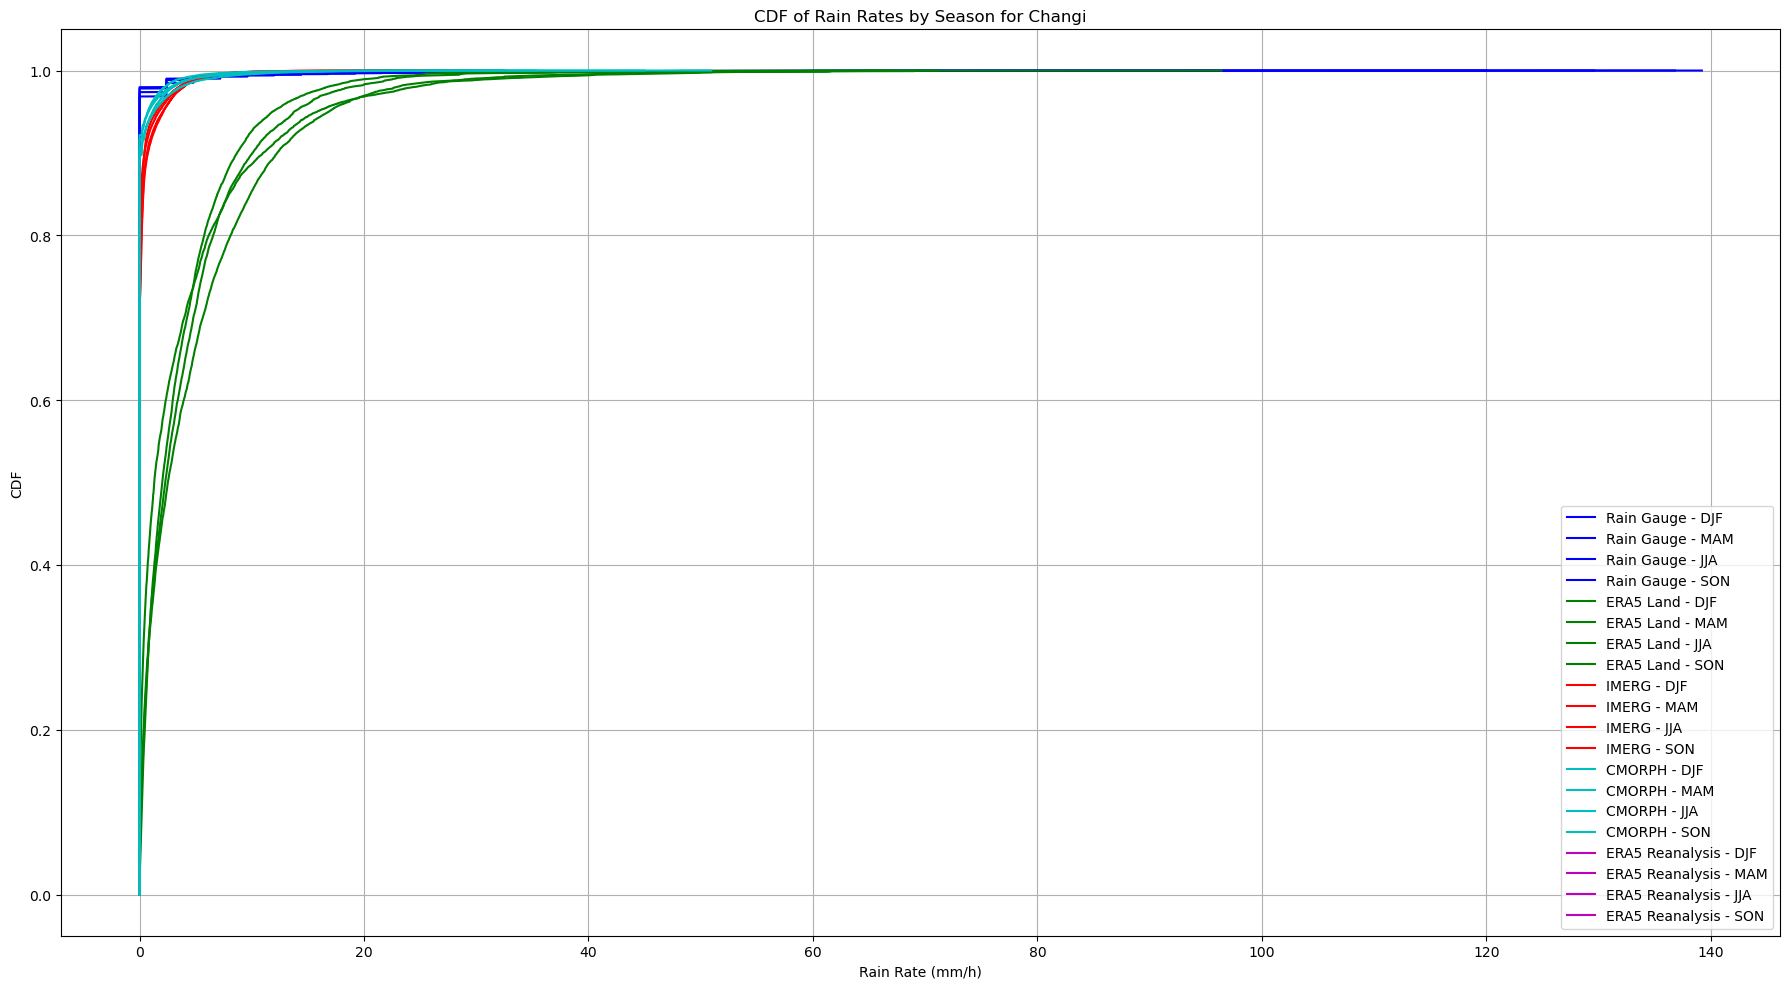

Rain Gauge - DJF Probability of 20mm/h rain: 0.0028
Rain Gauge - MAM Probability of 20mm/h rain: 0.0049
Rain Gauge - JJA Probability of 20mm/h rain: 0.0044
Rain Gauge - SON Probability of 20mm/h rain: 0.0048
ERA5 Land - DJF Probability of 20mm/h rain: 0.0302
ERA5 Land - MAM Probability of 20mm/h rain: 0.0181
ERA5 Land - JJA Probability of 20mm/h rain: 0.0098
ERA5 Land - SON Probability of 20mm/h rain: 0.0303
IMERG - DJF Probability of 20mm/h rain: 0.0000
IMERG - MAM Probability of 20mm/h rain: 0.0001
IMERG - JJA Probability of 20mm/h rain: 0.0002
IMERG - SON Probability of 20mm/h rain: 0.0001
CMORPH - DJF Probability of 20mm/h rain: 0.0014
CMORPH - MAM Probability of 20mm/h rain: 0.0005
CMORPH - JJA Probability of 20mm/h rain: 0.0007
CMORPH - SON Probability of 20mm/h rain: 0.0009
ERA5 Reanalysis - DJF Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - MAM Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - JJA Probability of 20mm/h rain: 0.0000
ERA5 Reanalysis - SON Probability of 

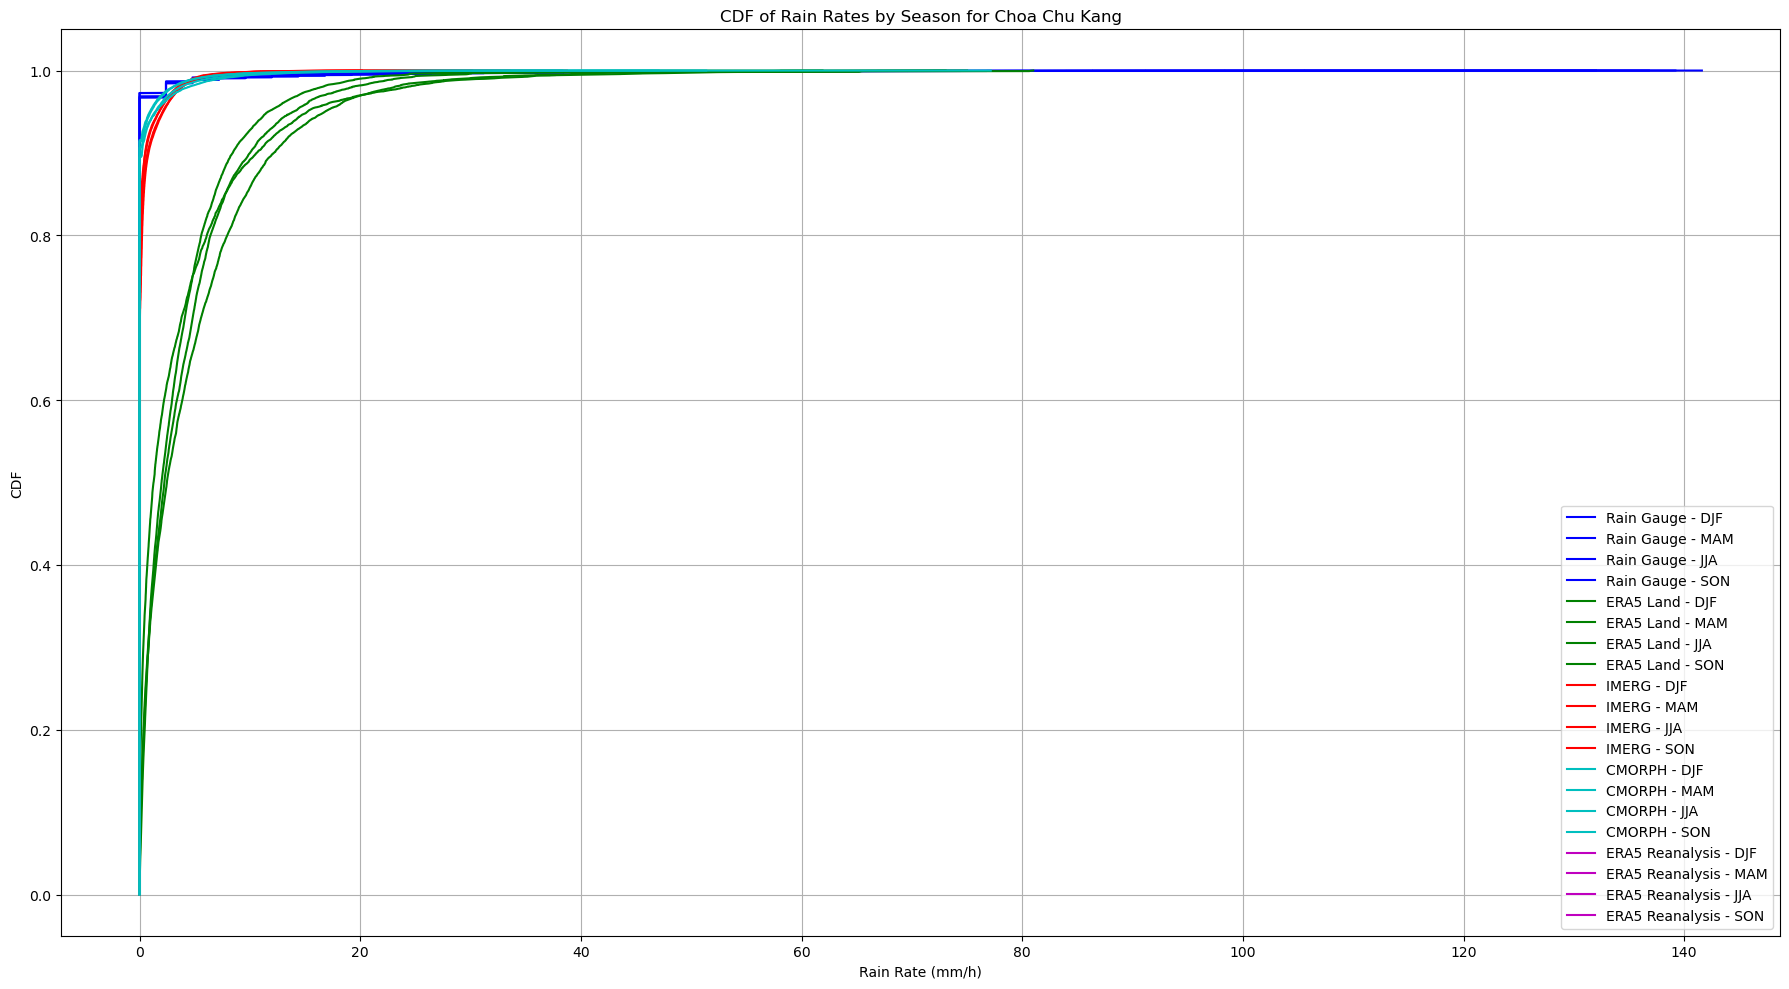

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the season to month mapping function
def season_to_month(season):
    if season == 'DJF':
        return 1
    elif season == 'MAM':
        return 4
    elif season == 'JJA':
        return 7
    elif season == 'SON':
        return 10

# Define a function to process and extract relevant columns for each dataset
def extract_relevant_columns(data, dataset_name):
    data = data.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])
    data['Year'] = data['Season_Year'].str[-4:].astype(int)
    data['Season'] = data['Season_Year'].str[:3]
    data['Month'] = data['Season'].apply(season_to_month)
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    data['Dataset'] = dataset_name
    return data[['Season', 'Tengah', 'Changi', 'Choa Chu Kang', 'Dataset']]

# Extract relevant columns from each dataset
rain_gauge_relevant = extract_relevant_columns(rain_gauge_filtered, 'Rain Gauge')
ERA5_Land_relevant = extract_relevant_columns(ERA5_Land_filtered, 'ERA5 Land')
IMERG_relevant = extract_relevant_columns(IMERG_filtered, 'IMERG')
CMORPH_relevant = extract_relevant_columns(CMORPH_filtered, 'CMORPH')
ERA5_Reanalysis_relevant = extract_relevant_columns(ERA5_Reanalysis_filtered, 'ERA5 Reanalysis')

# Apply the required multipliers
ERA5_Land_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
IMERG_relevant[['Tengah', 'Changi', 'Choa Chu Kang']]
ERA5_Reanalysis_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
rain_gauge_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 12
# Combine all datasets except NEA
combined_data = pd.concat([rain_gauge_relevant, ERA5_Land_relevant, IMERG_relevant, CMORPH_relevant])

# Function to calculate CDF and probability for 20mm/h rain
def calculate_cdf_and_probability(data, location):
    seasons = ['DJF', 'MAM', 'JJA', 'SON']
    results = {}

    for season in seasons:
        season_data = data[data['Season'] == season][location]
        sorted_data = np.sort(season_data)
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        
        # Handle the case where searchsorted returns an out-of-bounds index
        index_20mm = np.searchsorted(sorted_data, 20)
        if index_20mm >= len(sorted_data):
            probability = 0.0
        else:
            probability = 1 - cdf[index_20mm]
        
        results[season] = {'CDF': cdf, 'Sorted_Data': sorted_data, 'Probability': probability}
    
    return results

# Function to plot CDF for each dataset and season
def plot_cdf(location):
    plt.figure(figsize=(18, 10))
    
    datasets = ['Rain Gauge', 'ERA5 Land', 'IMERG', 'CMORPH','ERA5 Reanalysis']
    colors = ['b', 'g', 'r', 'c', 'm']
    
    for dataset, color in zip(datasets, colors):
        data = combined_data[combined_data['Dataset'] == dataset]
        cdf_results = calculate_cdf_and_probability(data, location)
        
        for season, result in cdf_results.items():
            plt.plot(result['Sorted_Data'], result['CDF'], label=f'{dataset} - {season}', color=color)
            print(f'{dataset} - {season} Probability of 20mm/h rain: {result["Probability"]:.4f}')
    
    # Add labels and title
    plt.xlabel('Rain Rate (mm/h)')
    plt.ylabel('CDF')
    plt.title(f'CDF of Rain Rates by Season for {location}')
    plt.legend()
    
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot CDF for each location
for location in ['Tengah', 'Changi', 'Choa Chu Kang']:
    plot_cdf(location)


Descriptive statistics using L-moments and KS test

Rain Gauge - DJF GEV Params: shape=-0.9881, loc=0.0061, scale=0.0032
ERA5 Land - DJF GEV Params: shape=-1.6277, loc=3.0602, scale=-0.3037
IMERG - DJF GEV Params: shape=-0.9596, loc=0.0564, scale=0.0107
CMORPH - DJF GEV Params: shape=-0.9685, loc=0.0175, scale=0.0075
ERA5 Reanalysis - DJF GEV Params: shape=-1.0947, loc=0.1147, scale=-0.0160


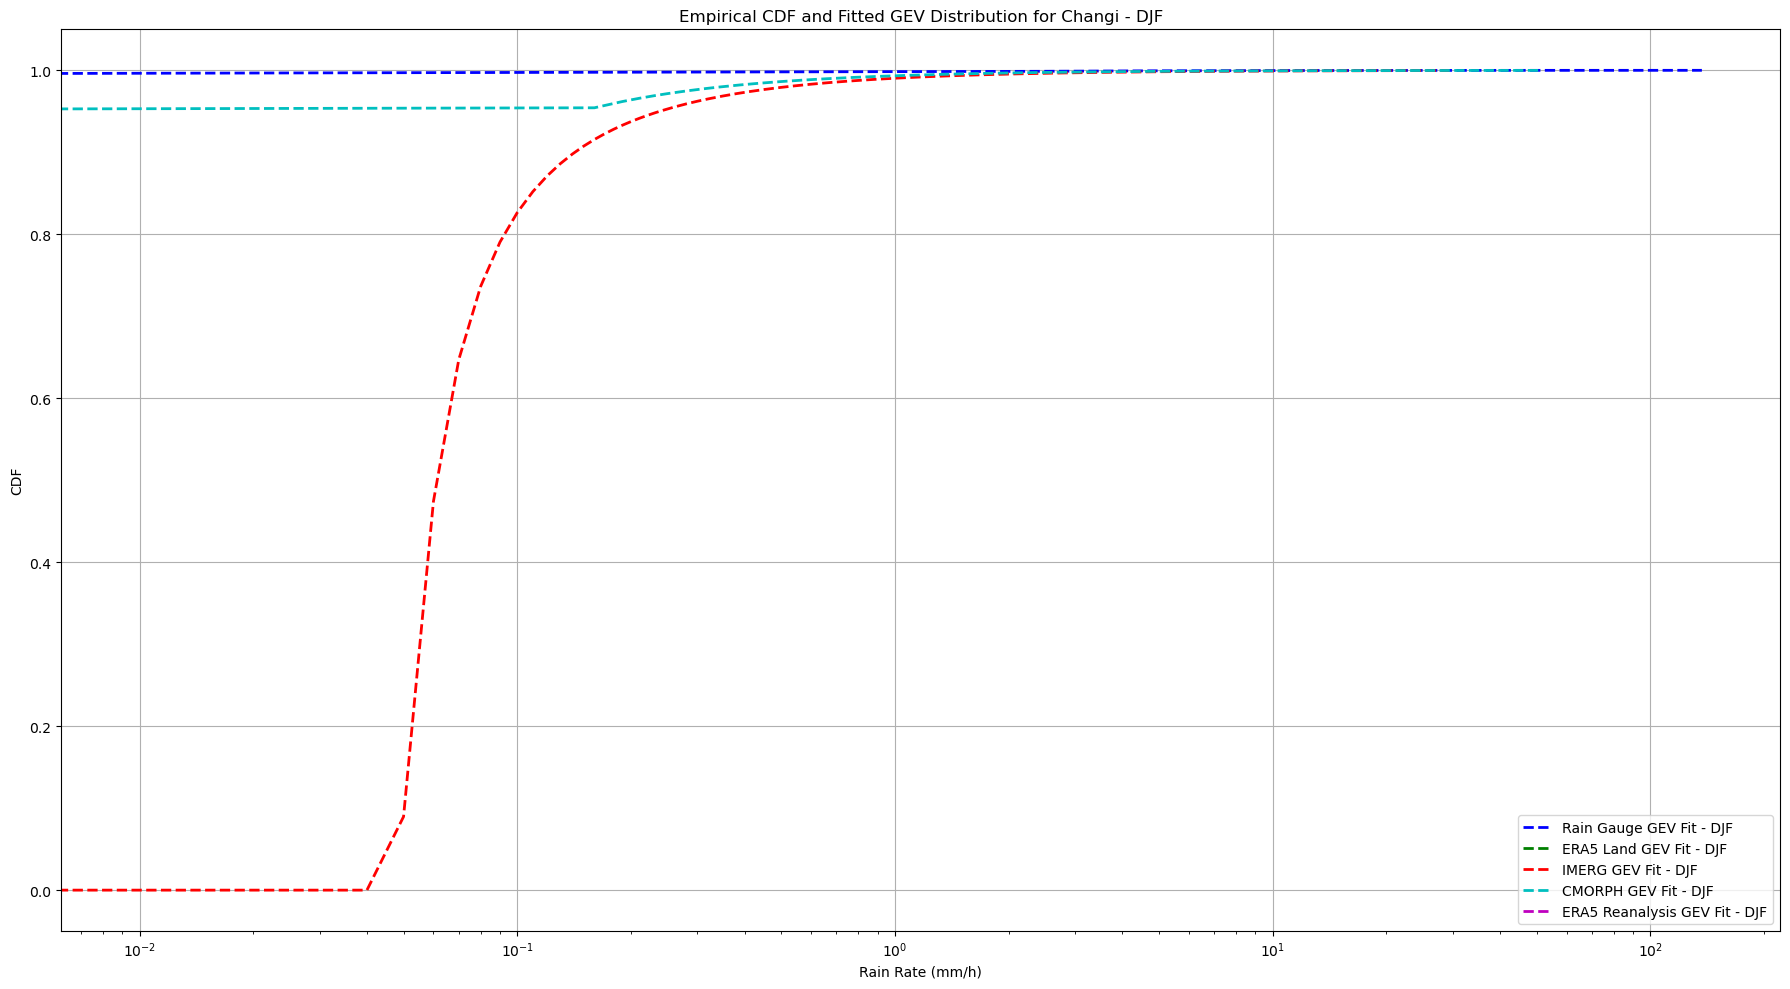

Rain Gauge - MAM GEV Params: shape=-0.9926, loc=0.0029, scale=0.0016
ERA5 Land - MAM GEV Params: shape=-2.7569, loc=3.9335, scale=0.1259
IMERG - MAM GEV Params: shape=-0.9581, loc=0.0326, scale=0.0095
CMORPH - MAM GEV Params: shape=-0.9727, loc=0.0107, scale=0.0048
ERA5 Reanalysis - MAM GEV Params: shape=-1.2144, loc=0.1539, scale=-0.0294


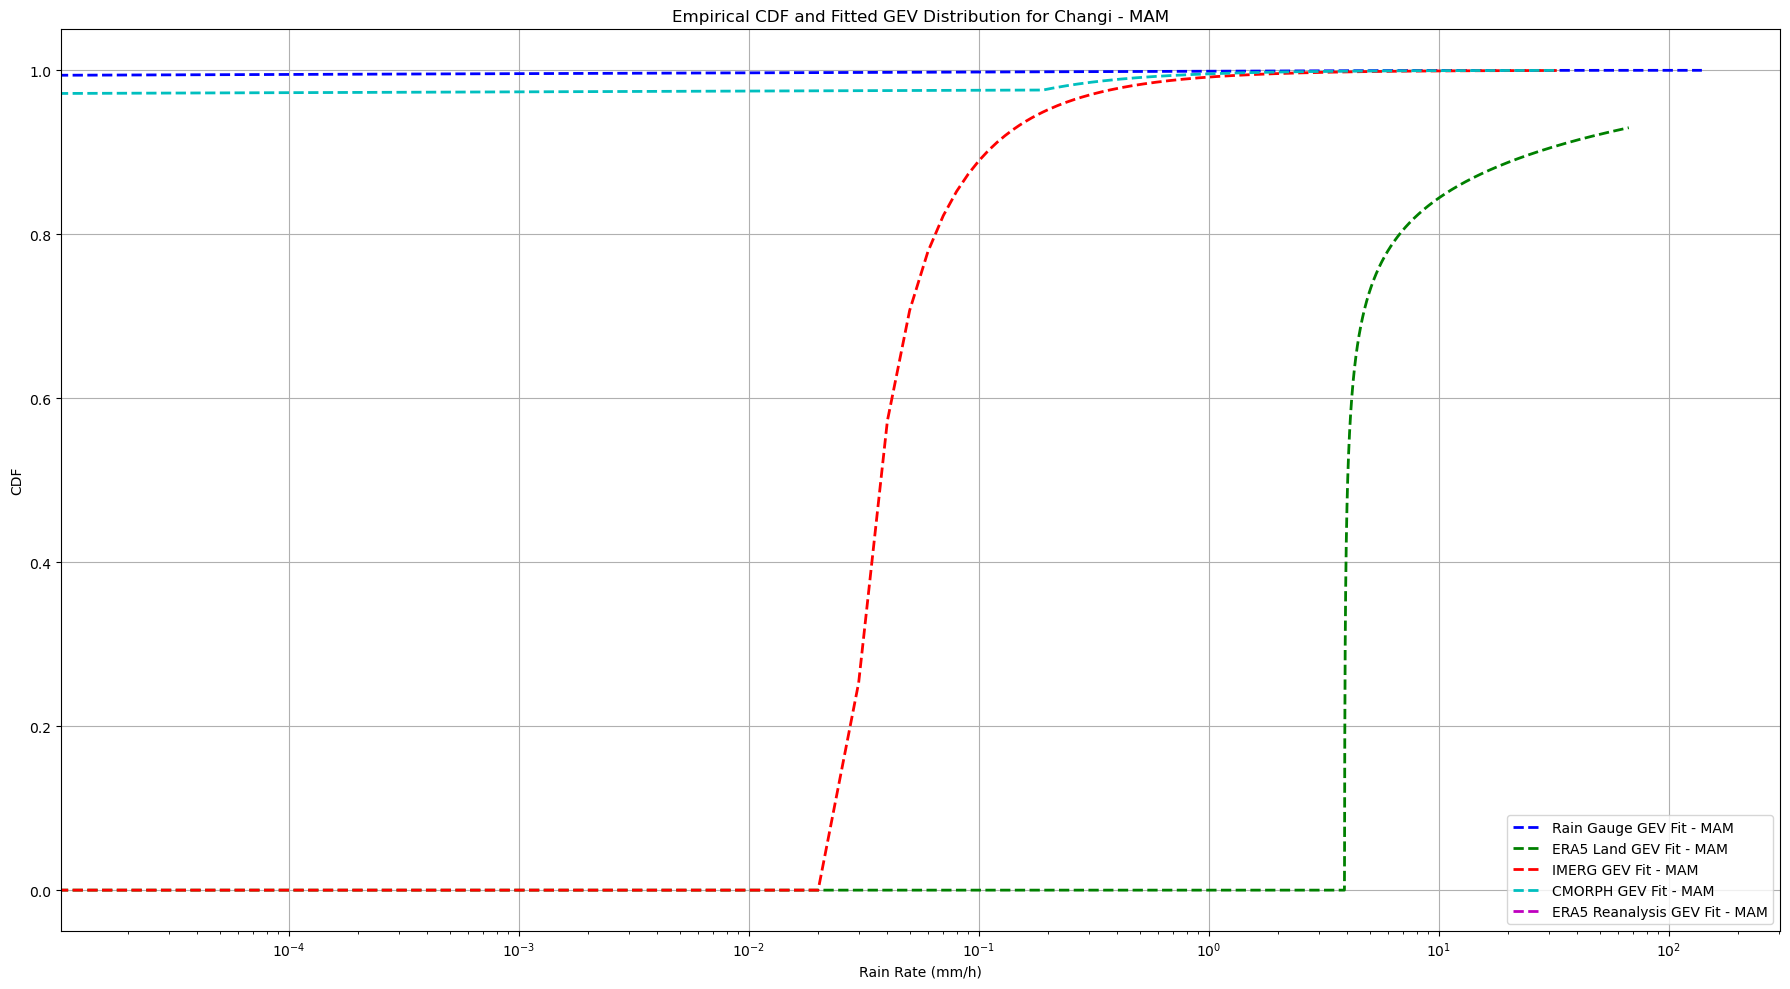

Rain Gauge - JJA GEV Params: shape=-0.9916, loc=0.0029, scale=0.0016
ERA5 Land - JJA GEV Params: shape=-3.1417, loc=3.4808, scale=-0.0697
IMERG - JJA GEV Params: shape=-0.9557, loc=0.0316, scale=0.0103
CMORPH - JJA GEV Params: shape=-0.9705, loc=0.0097, scale=0.0043
ERA5 Reanalysis - JJA GEV Params: shape=-1.2634, loc=0.1496, scale=-0.0282


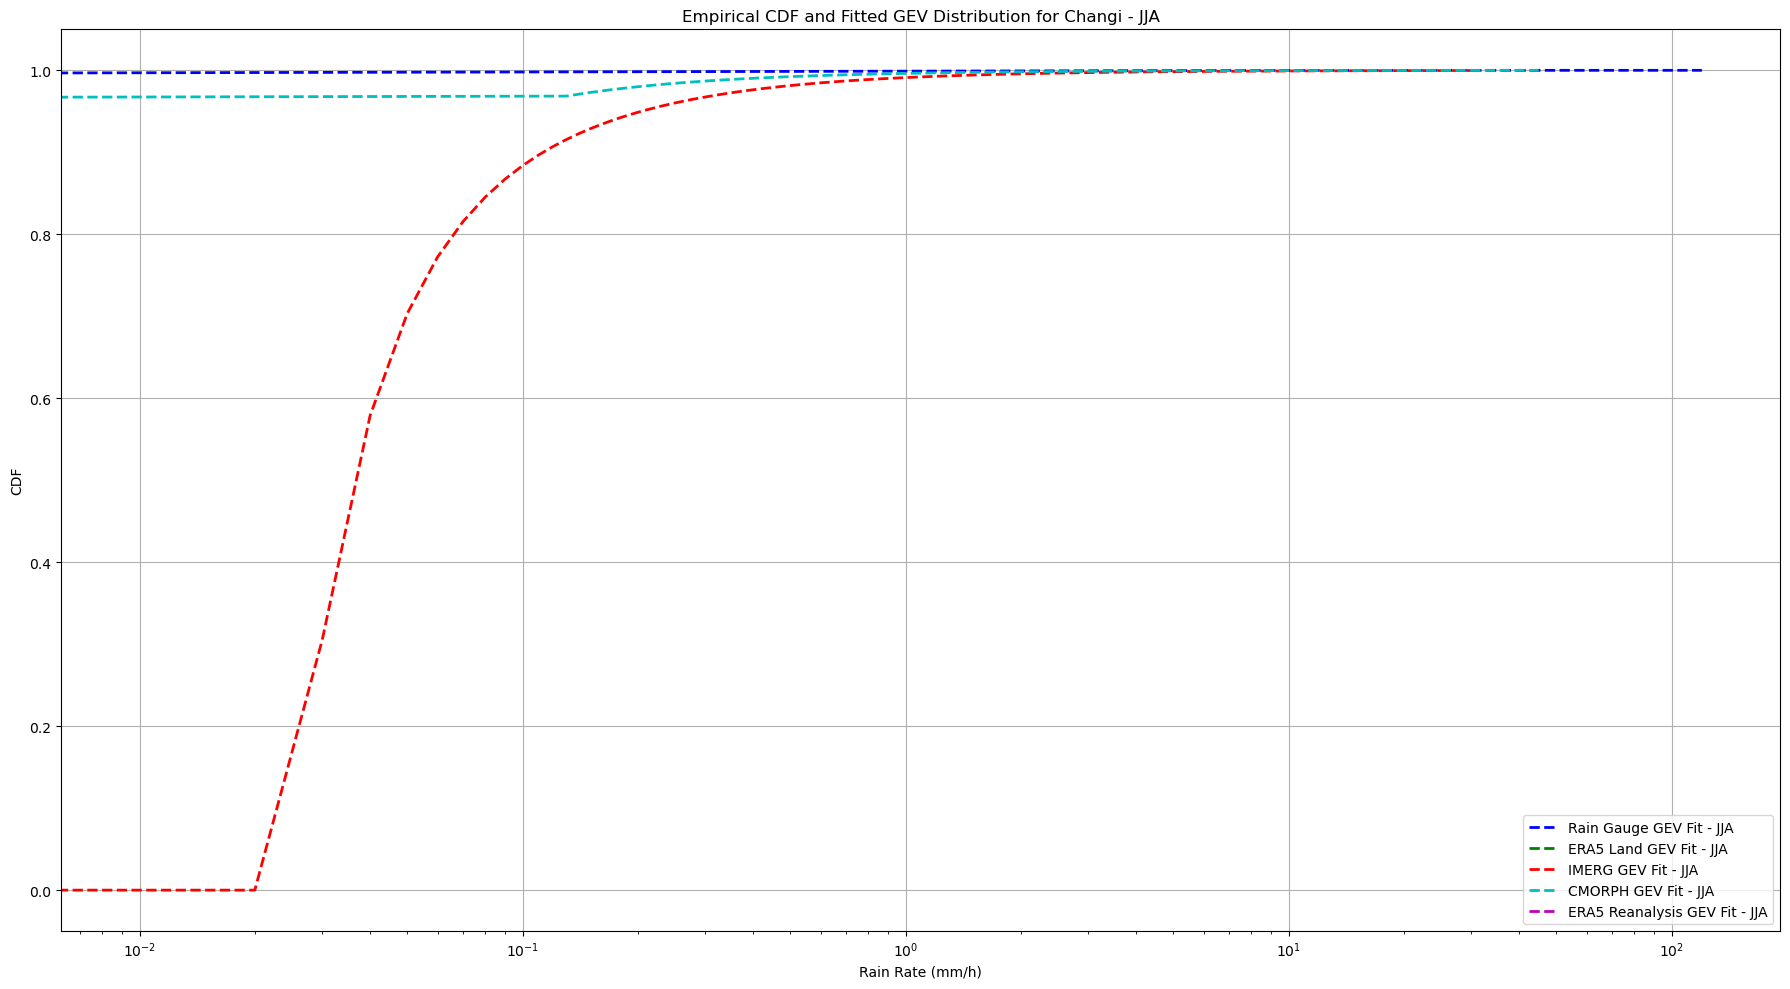

Rain Gauge - SON GEV Params: shape=-0.9903, loc=0.0042, scale=0.0022
ERA5 Land - SON GEV Params: shape=-2.4860, loc=4.7157, scale=0.2353
IMERG - SON GEV Params: shape=-0.9588, loc=0.0603, scale=0.0111
CMORPH - SON GEV Params: shape=-0.9666, loc=0.0163, scale=0.0067
ERA5 Reanalysis - SON GEV Params: shape=-1.2373, loc=0.1935, scale=-0.0360


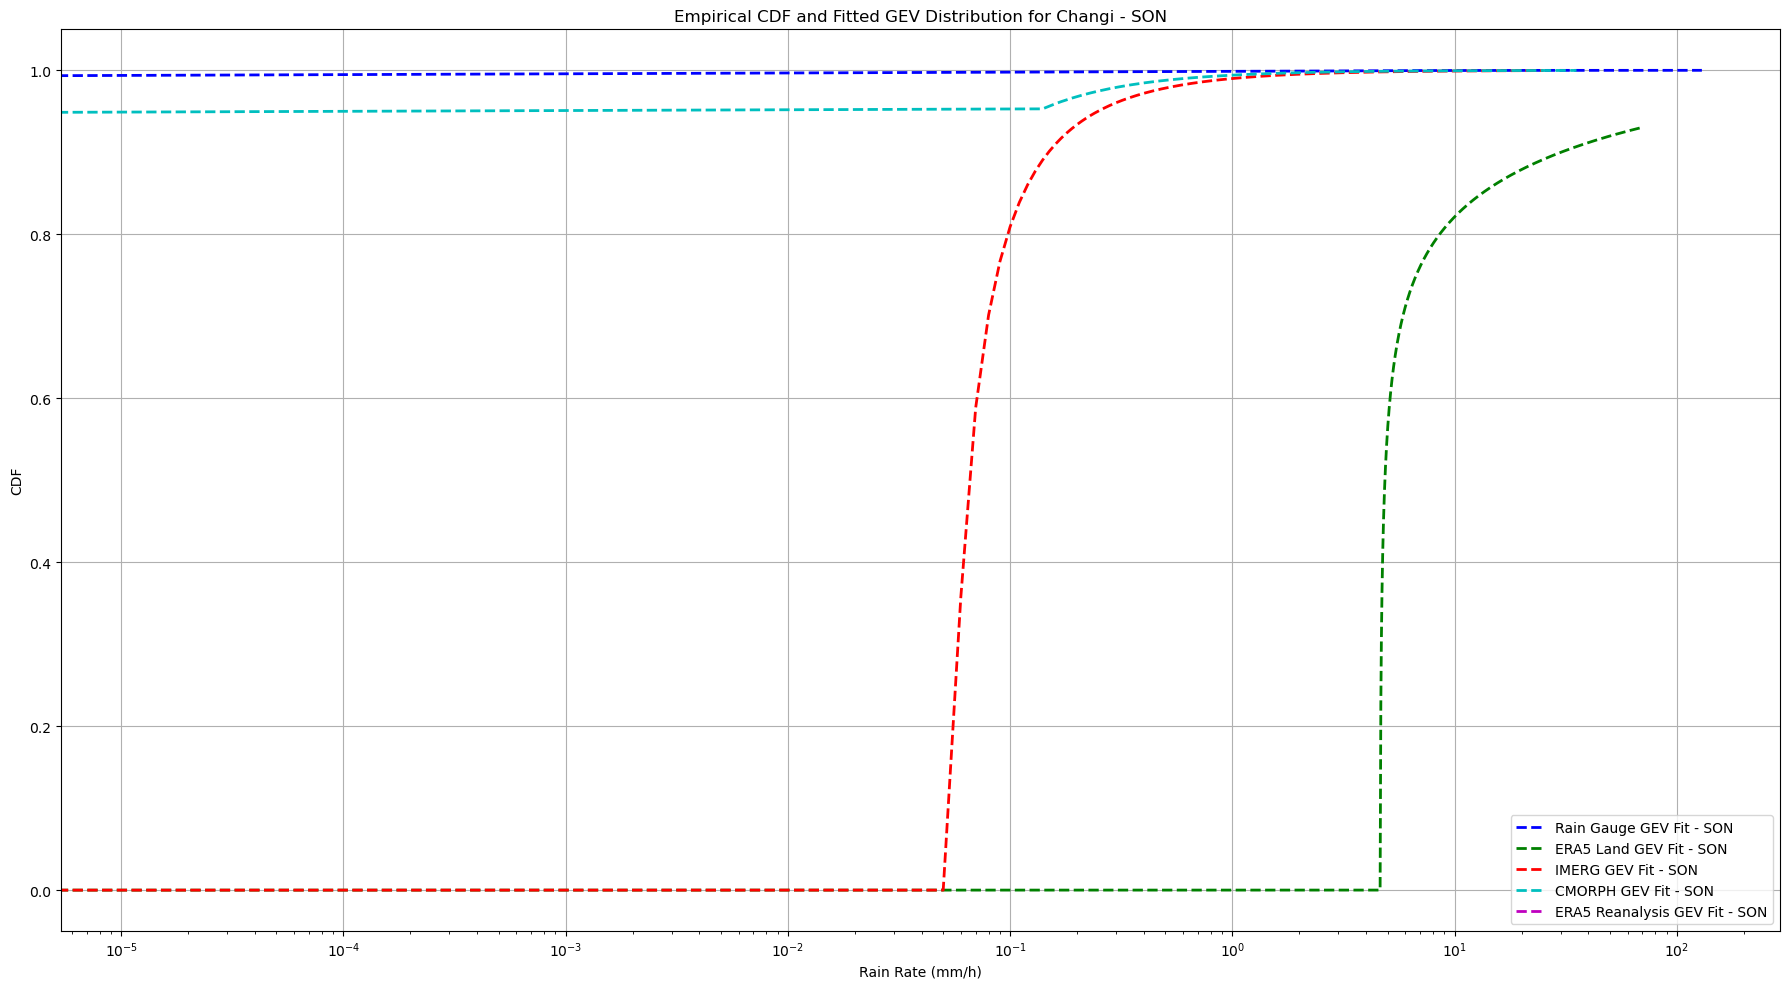

ERA5 Land - DJF KS Statistic: 0.9416, P-Value: 0.0000
IMERG - DJF KS Statistic: 0.2651, P-Value: 0.0000
CMORPH - DJF KS Statistic: 0.0626, P-Value: 0.0000
ERA5 Reanalysis - DJF KS Statistic: 0.7970, P-Value: 0.0000
ERA5 Land - MAM KS Statistic: 0.9655, P-Value: 0.0000
IMERG - MAM KS Statistic: 0.1811, P-Value: 0.0000
CMORPH - MAM KS Statistic: 0.0582, P-Value: 0.0000
ERA5 Reanalysis - MAM KS Statistic: 0.8654, P-Value: 0.0000
ERA5 Land - JJA KS Statistic: 0.9759, P-Value: 0.0000
IMERG - JJA KS Statistic: 0.1760, P-Value: 0.0000
CMORPH - JJA KS Statistic: 0.0618, P-Value: 0.0000
ERA5 Reanalysis - JJA KS Statistic: 0.8744, P-Value: 0.0000
ERA5 Land - SON KS Statistic: 0.9675, P-Value: 0.0000
IMERG - SON KS Statistic: 0.2654, P-Value: 0.0000
CMORPH - SON KS Statistic: 0.0768, P-Value: 0.0000
ERA5 Reanalysis - SON KS Statistic: 0.8486, P-Value: 0.0000


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, ks_2samp
from scipy.optimize import fsolve
import math
import warnings

warnings.filterwarnings("ignore")

# Define the season to month mapping function
def season_to_month(season):
    return {'DJF': 1, 'MAM': 4, 'JJA': 7, 'SON': 10}.get(season, 1)

# Define a function to process and extract relevant columns for each dataset
def extract_relevant_columns(data, dataset_name):
    data = data.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])
    data['Year'] = data['Season_Year'].str[-4:].astype(int)
    data['Season'] = data['Season_Year'].str[:3]
    data['Month'] = data['Season'].apply(season_to_month)
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    data['Dataset'] = dataset_name
    return data[['Season', 'Tengah', 'Changi', 'Choa Chu Kang', 'Dataset']]

# Assuming you have already defined and processed these datasets
# Extract relevant columns from each dataset
rain_gauge_relevant = extract_relevant_columns(rain_gauge_filtered, 'Rain Gauge')
ERA5_Land_relevant = extract_relevant_columns(ERA5_Land_filtered, 'ERA5 Land')
IMERG_relevant = extract_relevant_columns(IMERG_filtered, 'IMERG')
CMORPH_relevant = extract_relevant_columns(CMORPH_filtered, 'CMORPH')
ERA5_Reanalysis_relevant = extract_relevant_columns(ERA5_Reanalysis_filtered, 'ERA5 Reanalysis')

# Apply the required multipliers
ERA5_Land_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
ERA5_Reanalysis_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
rain_gauge_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 12

# Combine all datasets except NEA
combined_data = pd.concat([rain_gauge_relevant, ERA5_Land_relevant, IMERG_relevant, CMORPH_relevant, ERA5_Reanalysis_relevant])

# Function to calculate L-moments
def calculate_l_moments(data):
    n = len(data)
    if n == 0:
        return [np.nan, np.nan, np.nan]
    
    b0 = np.mean(data)
    data_sorted = np.sort(data)
    
    b1 = np.mean([(i + 1 - (n - i)) * data_sorted[i] for i in range(n)]) / n
    l1 = b0
    l2 = 2 * b1 - b0
    
    if n < 3:
        return [l1, l2, np.nan]
    
    b2 = np.mean([(i + 1) * (i + 1 - (n - i)) * data_sorted[i] for i in range(n)]) / (n * (n - 1))
    l3 = 6 * b2 - 6 * b1 + b0
    
    return [l1, l2, l3]

# Function to estimate GEV parameters using fsolve and L-moments
def pargev_fsolve(lmom):
    lmom_ratios = [lmom[0], lmom[1], lmom[2] / lmom[1]]
    f = lambda x, t: 2 * (1 - 3**(-x)) / (1 - 2**(-x)) - 3 - t
    G = fsolve(f, 0.01, lmom_ratios[2])[0]
    para3 = G
    GAM = math.gamma(1 + G)
    para2 = lmom_ratios[1] * G / (GAM * (1 - 2**-G))
    para1 = lmom_ratios[0] - para2 * (1 - GAM) / G
    return para1, para2, para3

# Function to plot the empirical data and fitted GEV distribution
def plot_gev_fit(location, season):
    plt.figure(figsize=(18, 10))
    datasets = ['Rain Gauge', 'ERA5 Land', 'IMERG', 'CMORPH', 'ERA5 Reanalysis']
    colors = ['b', 'g', 'r', 'c', 'm']
    
    for dataset, color in zip(datasets, colors):
        data = combined_data[(combined_data['Dataset'] == dataset) & (combined_data['Season'] == season)][location].dropna()
        l_moments = calculate_l_moments(data)
        gev_params = pargev_fsolve(l_moments)
        
        if gev_params is None:
            print(f'{dataset} - {season} has insufficient data to estimate GEV parameters')
            continue
        
        loc, scale, shape = gev_params
        
        # Plot the empirical data
        sorted_data = np.sort(data)
        cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        #plt.plot(sorted_data, cdf, label=f'{dataset} Empirical - {season}', color=color, linestyle='-', linewidth=2)
        
        # Plot the fitted GEV distribution
        fitted_cdf = genextreme.cdf(sorted_data, c=shape, loc=loc, scale=scale)
        plt.plot(sorted_data, fitted_cdf, label=f'{dataset} GEV Fit - {season}', color=color, linestyle='--', linewidth=2)
        
        print(f'{dataset} - {season} GEV Params: shape={shape:.4f}, loc={loc:.4f}, scale={scale:.4f}')
    
    plt.xlabel('Rain Rate (mm/h)')
    plt.ylabel('CDF')
    plt.title(f'Empirical CDF and Fitted GEV Distribution for {location} - {season}')
    plt.legend()
    plt.xscale('log')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the GEV fit for each location and season
seasons = ['DJF', 'MAM', 'JJA', 'SON']
locations = ['Tengah', 'Changi', 'Choa Chu Kang']
for location in locations:
    if location == 'Changi':
        for season in seasons:
            plot_gev_fit(location, season)

# Function to calculate and print the KS statistic
def calculate_ks_statistic(location, season):
    datasets = ['Rain Gauge', 'ERA5 Land', 'IMERG', 'CMORPH', 'ERA5 Reanalysis']
    rain_gauge_data = combined_data[(combined_data['Dataset'] == 'Rain Gauge') & (combined_data['Season'] == season)][location].dropna()
    
    for dataset in datasets[1:]:
        data = combined_data[(combined_data['Dataset'] == dataset) & (combined_data['Season'] == season)][location].dropna()
        ks_stat, ks_p_value = ks_2samp(rain_gauge_data, data)
        print(f'{dataset} - {season} KS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}')

# Calculate the KS statistic for each dataset and season
seasons = ['DJF', 'MAM', 'JJA', 'SON']
locations = ['Tengah', 'Changi', 'Choa Chu Kang']
for location in locations:
    if location == 'Changi':
        for season in seasons:
            calculate_ks_statistic(location, season)


Rain Gauge - DJF Probability of 20mm/h rain: 0.0030
ERA5 Land - DJF Probability of 20mm/h rain: 0.0271
IMERG - DJF Probability of 20mm/h rain: 0.0000
CMORPH - DJF Probability of 20mm/h rain: 0.0011
ERA5 Reanalysis - DJF Probability of 20mm/h rain: 0.0000


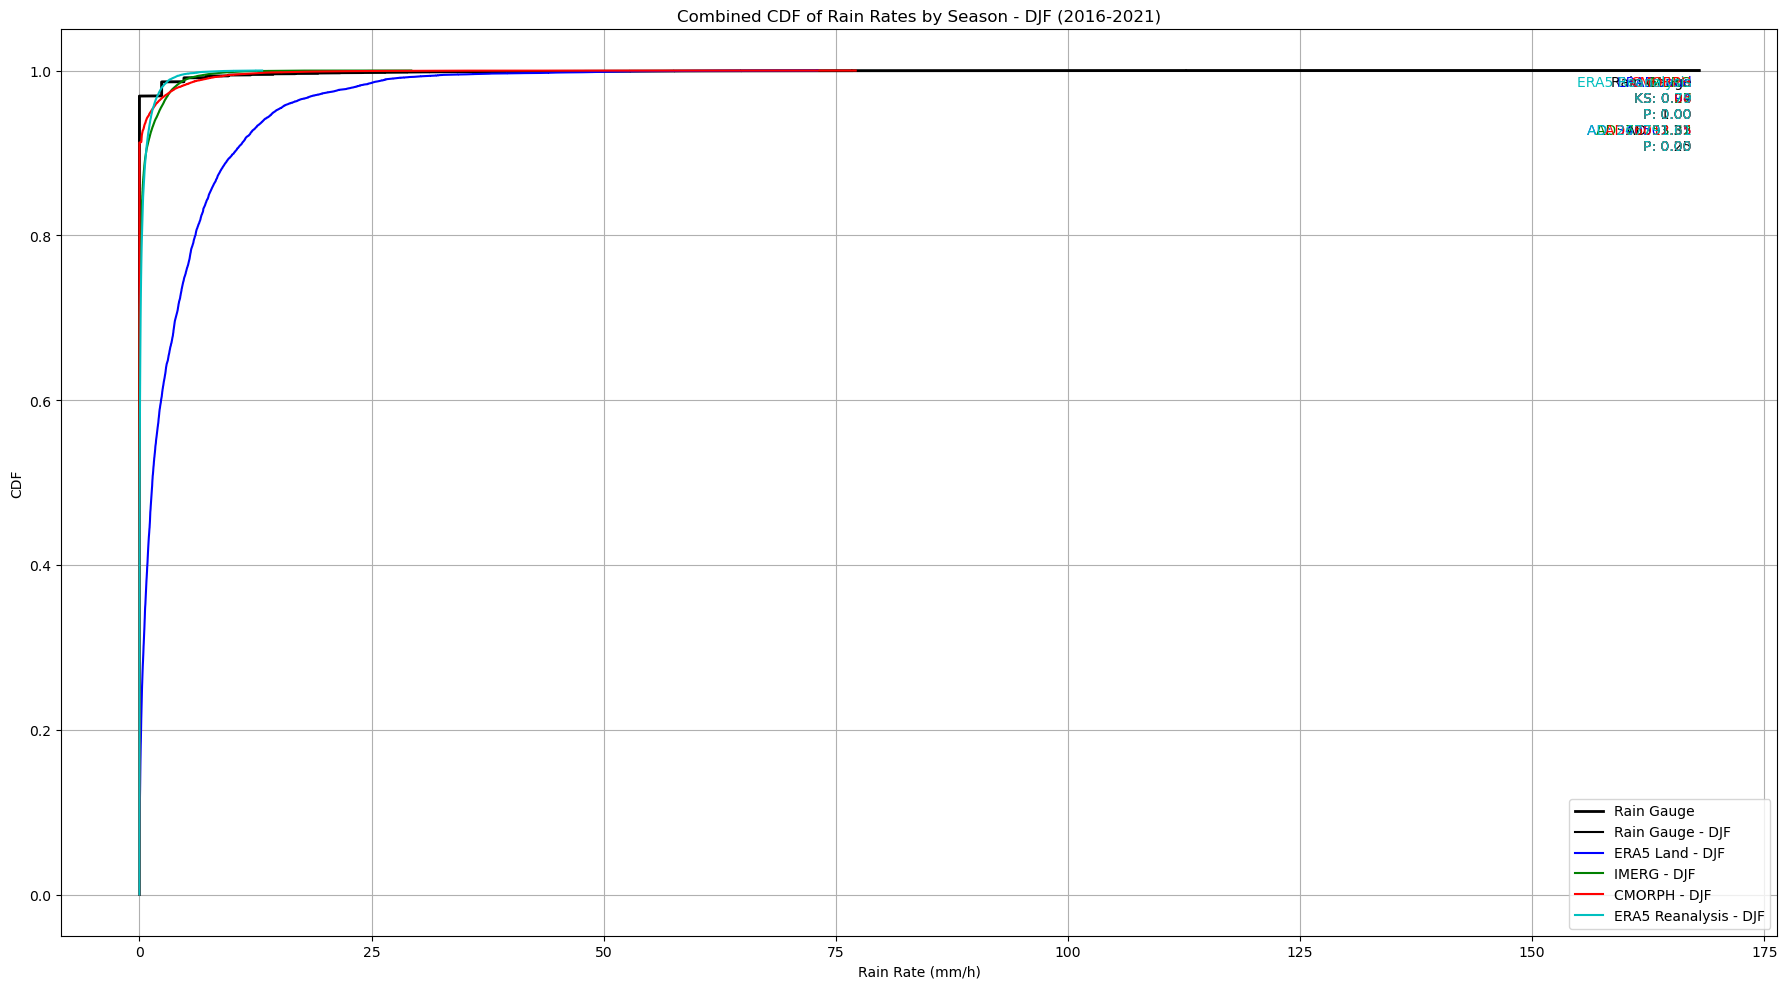

Statistics for Combined Data - DJF (2016-2021):
Rain Gauge - KS Statistic: 0.0000, KS P-Value: 1.0000, AD Statistic: -1.3134, AD P-Value: 0.2500
ERA5 Land - KS Statistic: 0.9443, KS P-Value: 0.0000, AD Statistic: 340503.3470, AD P-Value: 0.0010
IMERG - KS Statistic: 0.2672, KS P-Value: 0.0000, AD Statistic: 75753.3174, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0564, KS P-Value: 0.0000, AD Statistic: 6012.6500, AD P-Value: 0.0010
ERA5 Reanalysis - KS Statistic: 0.7917, KS P-Value: 0.0000, AD Statistic: 267791.6063, AD P-Value: 0.0010
Rain Gauge - MAM Probability of 20mm/h rain: 0.0044
ERA5 Land - MAM Probability of 20mm/h rain: 0.0216
IMERG - MAM Probability of 20mm/h rain: 0.0001
CMORPH - MAM Probability of 20mm/h rain: 0.0005
ERA5 Reanalysis - MAM Probability of 20mm/h rain: 0.0000


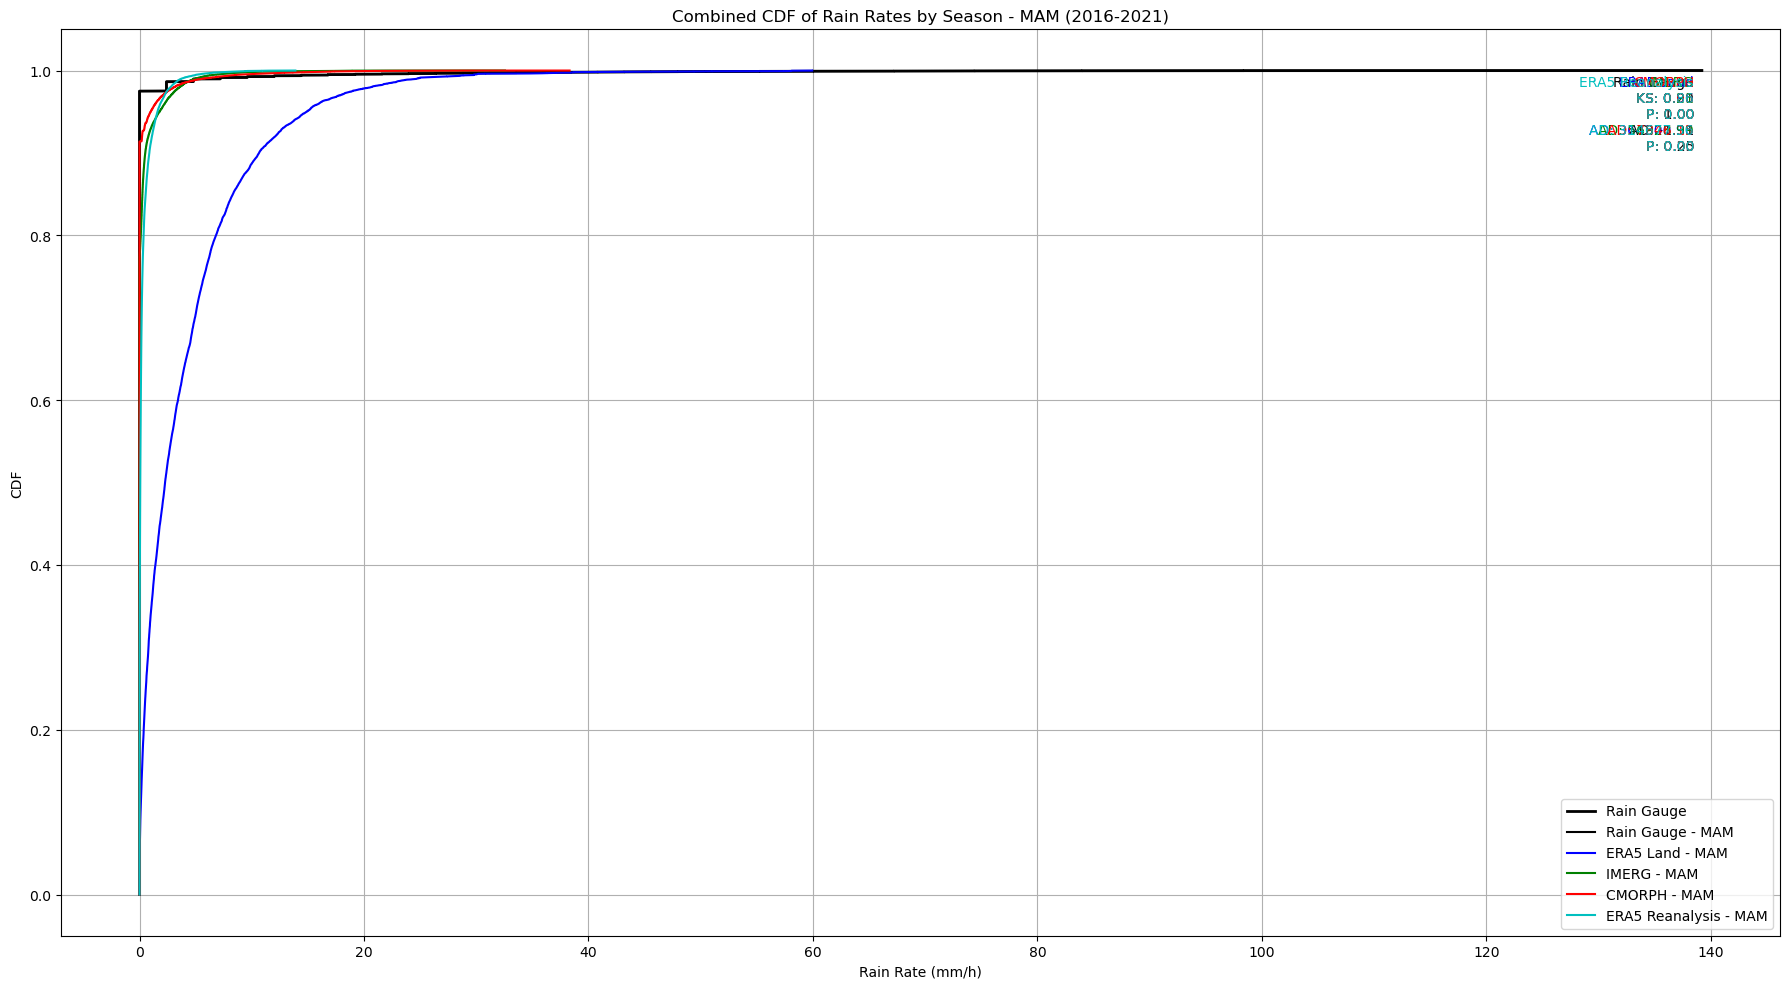

Statistics for Combined Data - MAM (2016-2021):
Rain Gauge - KS Statistic: 0.0000, KS P-Value: 1.0000, AD Statistic: -1.3134, AD P-Value: 0.2500
ERA5 Land - KS Statistic: 0.9586, KS P-Value: 0.0000, AD Statistic: 364300.9562, AD P-Value: 0.0010
IMERG - KS Statistic: 0.2052, KS P-Value: 0.0000, AD Statistic: 56928.9876, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0612, KS P-Value: 0.0000, AD Statistic: 7846.1481, AD P-Value: 0.0010
ERA5 Reanalysis - KS Statistic: 0.8595, KS P-Value: 0.0000, AD Statistic: 314677.3597, AD P-Value: 0.0010
Rain Gauge - JJA Probability of 20mm/h rain: 0.0039
ERA5 Land - JJA Probability of 20mm/h rain: 0.0087
IMERG - JJA Probability of 20mm/h rain: 0.0001
CMORPH - JJA Probability of 20mm/h rain: 0.0004
ERA5 Reanalysis - JJA Probability of 20mm/h rain: 0.0000


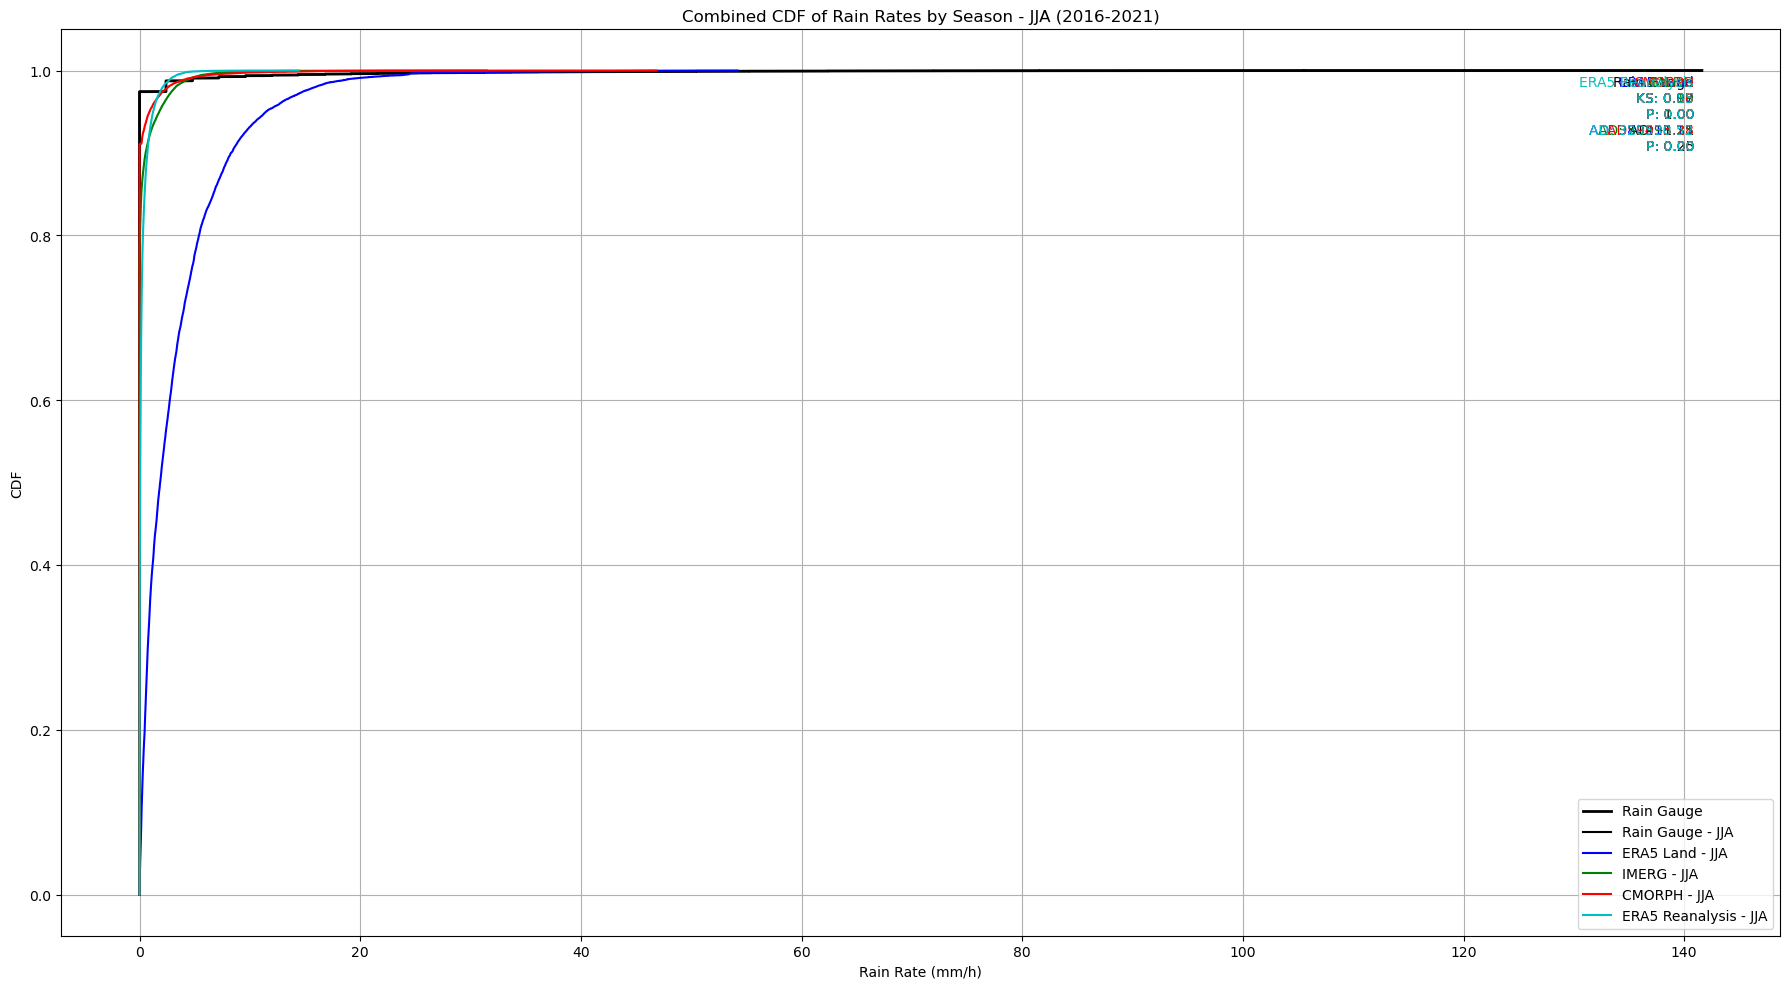

Statistics for Combined Data - JJA (2016-2021):
Rain Gauge - KS Statistic: 0.0000, KS P-Value: 1.0000, AD Statistic: -1.3134, AD P-Value: 0.2500
ERA5 Land - KS Statistic: 0.9716, KS P-Value: 0.0000, AD Statistic: 380418.1490, AD P-Value: 0.0010
IMERG - KS Statistic: 0.1928, KS P-Value: 0.0000, AD Statistic: 52993.2538, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0637, KS P-Value: 0.0000, AD Statistic: 9035.2773, AD P-Value: 0.0010
ERA5 Reanalysis - KS Statistic: 0.8543, KS P-Value: 0.0000, AD Statistic: 320530.5196, AD P-Value: 0.0010
Rain Gauge - SON Probability of 20mm/h rain: 0.0042
ERA5 Land - SON Probability of 20mm/h rain: 0.0313
IMERG - SON Probability of 20mm/h rain: 0.0001
CMORPH - SON Probability of 20mm/h rain: 0.0005
ERA5 Reanalysis - SON Probability of 20mm/h rain: 0.0000


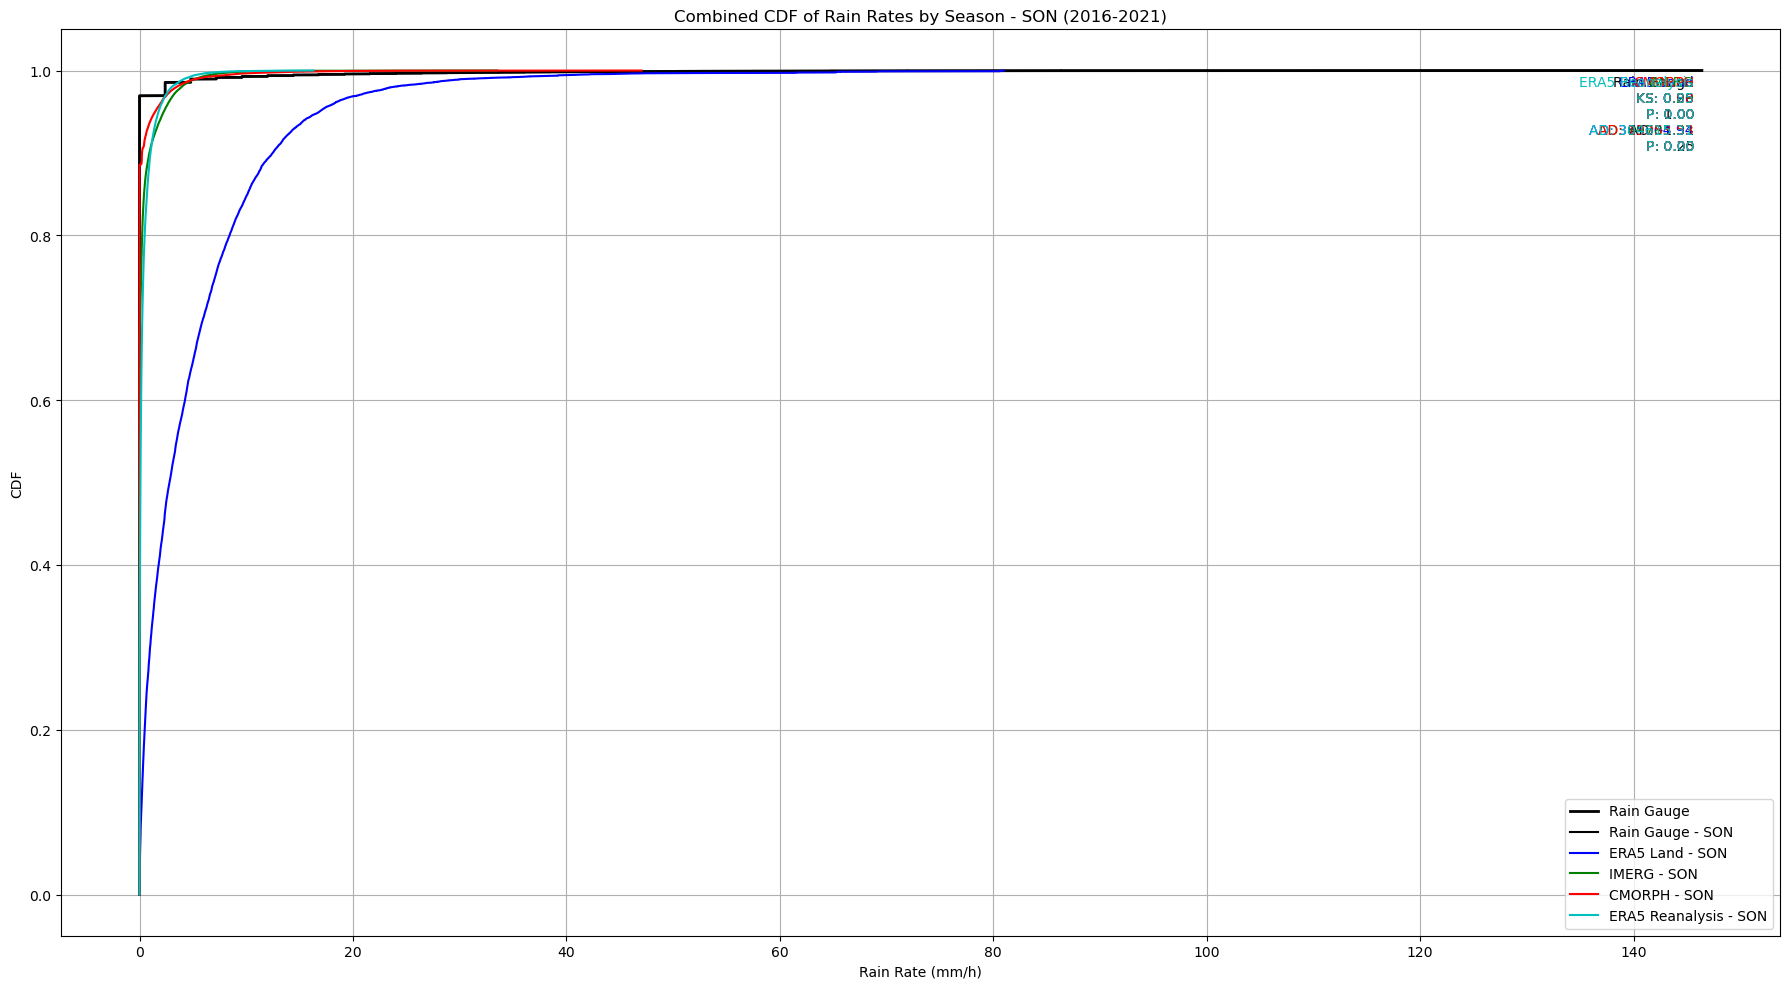

Statistics for Combined Data - SON (2016-2021):
Rain Gauge - KS Statistic: 0.0000, KS P-Value: 1.0000, AD Statistic: -1.3134, AD P-Value: 0.2500
ERA5 Land - KS Statistic: 0.9648, KS P-Value: 0.0000, AD Statistic: 365004.9378, AD P-Value: 0.0010
IMERG - KS Statistic: 0.2940, KS P-Value: 0.0000, AD Statistic: 89785.3348, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0836, KS P-Value: 0.0000, AD Statistic: 13053.5293, AD P-Value: 0.0010
ERA5 Reanalysis - KS Statistic: 0.8491, KS P-Value: 0.0000, AD Statistic: 304615.3101, AD P-Value: 0.0010


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, anderson_ksamp

# Define the season to month mapping function
def season_to_month(season):
    return {'DJF': 1, 'MAM': 4, 'JJA': 7, 'SON': 10}.get(season, 1)

# Define a function to process and extract relevant columns for each dataset
def extract_relevant_columns(data, dataset_name):
    data = data.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])
    data['Year'] = data['Season_Year'].str[-4:].astype(int)
    data['Season'] = data['Season_Year'].str[:3]
    data['Month'] = data['Season'].apply(season_to_month)
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    data['Dataset'] = dataset_name
    return data[['Season', 'Year', 'Tengah', 'Changi', 'Choa Chu Kang', 'Dataset']]

# Extract relevant columns from each dataset
rain_gauge_relevant = extract_relevant_columns(rain_gauge_filtered, 'Rain Gauge')
ERA5_Land_relevant = extract_relevant_columns(ERA5_Land_filtered, 'ERA5 Land')
IMERG_relevant = extract_relevant_columns(IMERG_filtered, 'IMERG')
CMORPH_relevant = extract_relevant_columns(CMORPH_filtered, 'CMORPH')
ERA5_Reanalysis_relevant = extract_relevant_columns(ERA5_Reanalysis_filtered, 'ERA5 Reanalysis')

# Apply the required multipliers
ERA5_Land_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
ERA5_Reanalysis_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
rain_gauge_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 12

# Filter out zero values in the relevant columns
#rain_gauge_relevant = rain_gauge_relevant[(rain_gauge_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] > 0).all(axis=1)]

# Filter data to only include records from 2016 to 2021
def filter_years(data, start_year, end_year):
    return data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]

rain_gauge_relevant = filter_years(rain_gauge_relevant, 2016, 2021)
ERA5_Land_relevant = filter_years(ERA5_Land_relevant, 2016, 2021)
IMERG_relevant = filter_years(IMERG_relevant, 2016, 2021)
CMORPH_relevant = filter_years(CMORPH_relevant, 2016, 2021)
ERA5_Reanalysis_relevant = filter_years(ERA5_Reanalysis_relevant, 2016, 2021)

# Combine all datasets except NEA
combined_data = pd.concat([rain_gauge_relevant, ERA5_Land_relevant, IMERG_relevant, CMORPH_relevant, ERA5_Reanalysis_relevant])

# Function to calculate combined CDF and probability for 20mm/h rain
def calculate_combined_cdf(data):
    combined_data = data[['Tengah', 'Changi', 'Choa Chu Kang']].values.flatten()
    sorted_data = np.sort(combined_data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    index_20mm = np.searchsorted(sorted_data, 20)
    if index_20mm >= len(sorted_data):
        probability = 0.0
    else:
        probability = 1 - cdf[index_20mm]
    return cdf, sorted_data, probability

# Function to plot combined CDF for each dataset and season, and perform K-S and Anderson-Darling tests
def plot_combined_cdf_and_stats(season):
    plt.figure(figsize=(18, 10))
    datasets = ['Rain Gauge', 'ERA5 Land', 'IMERG', 'CMORPH', 'ERA5 Reanalysis']
    colors = ['k', 'b', 'g', 'r', 'c']
    rain_gauge_data = combined_data[(combined_data['Dataset'] == 'Rain Gauge') & (combined_data['Season'] == season)]
    gauge_cdf, gauge_sorted_data, _ = calculate_combined_cdf(rain_gauge_data)
    plt.plot(gauge_sorted_data, gauge_cdf, label='Rain Gauge', color='k', linestyle='-', linewidth=2)
    
    stats_results = []
    for dataset, color in zip(datasets[:], colors[:]):
        data = combined_data[(combined_data['Dataset'] == dataset) & (combined_data['Season'] == season)]
        cdf, sorted_data, probability = calculate_combined_cdf(data)
        plt.plot(sorted_data, cdf, label=f'{dataset} - {season}', color=color)
        print(f'{dataset} - {season} Probability of 20mm/h rain: {probability:.4f}')
        
        ks_statistic, ks_p_value = kstest(sorted_data, gauge_sorted_data)
        ad_result = anderson_ksamp([sorted_data, gauge_sorted_data])
        stats_results.append((dataset, ks_statistic, ks_p_value, ad_result.statistic, ad_result.significance_level))
        
        plt.text(0.95, 0.95, f'{dataset}\nKS: {ks_statistic:.2f}\nP: {ks_p_value:.2f}\nAD: {ad_result.statistic:.2f}\nP: {ad_result.significance_level:.2f}', 
                 horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color=color)
    
    plt.xlabel('Rain Rate (mm/h)')
    plt.ylabel('CDF')
    plt.title(f'Combined CDF of Rain Rates by Season - {season} (2016-2021)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print out the statistics for each dataset
    print(f'Statistics for Combined Data - {season} (2016-2021):')
    for result in stats_results:
        dataset, ks_statistic, ks_p_value, ad_statistic, ad_p_value = result
        print(f'{dataset} - KS Statistic: {ks_statistic:.4f}, KS P-Value: {ks_p_value:.4f}, AD Statistic: {ad_statistic:.4f}, AD P-Value: {ad_p_value:.4f}')

# Plot combined CDF and statistics for each season
seasons = ['DJF', 'MAM', 'JJA', 'SON']
for season in seasons:
    plot_combined_cdf_and_stats(season)


Splitting data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, anderson_ksamp

# Define the season to month mapping function
def season_to_month(season):
    return {'DJF': 1, 'MAM': 4, 'JJA': 7, 'SON': 10}.get(season, 1)

# Define a function to process and extract relevant columns for each dataset
def extract_relevant_columns(data, dataset_name):
    data = data.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])
    data['Year'] = data['Season_Year'].str[-4:].astype(int)
    data['Season'] = data['Season_Year'].str[:3]
    data['Month'] = data['Season'].apply(season_to_month)
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    data['Dataset'] = dataset_name
    return data[['Season', 'Year', 'Tengah', 'Changi', 'Choa Chu Kang', 'Dataset']]

# Extract relevant columns from each dataset
rain_gauge_relevant = extract_relevant_columns(rain_gauge_filtered, 'Rain Gauge')
ERA5_Land_relevant = extract_relevant_columns(ERA5_Land_filtered, 'ERA5 Land')
IMERG_relevant = extract_relevant_columns(IMERG_filtered, 'IMERG')
CMORPH_relevant = extract_relevant_columns(CMORPH_filtered, 'CMORPH')
ERA5_Reanalysis_relevant = extract_relevant_columns(ERA5_Reanalysis_filtered, 'ERA5 Reanalysis')

# Apply the required multipliers
ERA5_Land_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
ERA5_Reanalysis_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
rain_gauge_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 12

# Filter out zero values in the relevant columns
#rain_gauge_relevant = rain_gauge_relevant[(rain_gauge_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] > 0).all(axis=1)]

# Filter data to split into two sets
def filter_years(data, start_year, end_year):
    return data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]

# Split data into 2016-2020 and 2020-2021
rain_gauge_2016_2020 = filter_years(rain_gauge_relevant, 2016, 2020)
rain_gauge_2020_2021 = filter_years(rain_gauge_relevant, 2020, 2021)
ERA5_Land_2016_2020 = filter_years(ERA5_Land_relevant, 2016, 2020)
ERA5_Land_2020_2021 = filter_years(ERA5_Land_relevant, 2020, 2021)
IMERG_2016_2020 = filter_years(IMERG_relevant, 2016, 2020)
IMERG_2020_2021 = filter_years(IMERG_relevant, 2020, 2021)
CMORPH_2016_2020 = filter_years(CMORPH_relevant, 2016, 2020)
CMORPH_2020_2021 = filter_years(CMORPH_relevant, 2020, 2021)
ERA5_Reanalysis_2016_2020 = filter_years(ERA5_Reanalysis_relevant, 2016, 2020)
ERA5_Reanalysis_2020_2021 = filter_years(ERA5_Reanalysis_relevant, 2020, 2021)

# Combine data for 2016-2020
combined_2016_2020 = pd.concat([rain_gauge_2016_2020, ERA5_Land_2016_2020, IMERG_2016_2020, CMORPH_2016_2020, ERA5_Reanalysis_2016_2020])

# Combine data for 2020-2021
combined_2020_2021 = pd.concat([rain_gauge_2020_2021, ERA5_Land_2020_2021, IMERG_2020_2021, CMORPH_2020_2021, ERA5_Reanalysis_2020_2021])


Qmapping

In [24]:
def quantile_mapping(observed, simulated):
    """Perform quantile mapping for bias correction."""
    sorted_observed = np.sort(observed)
    sorted_simulated = np.sort(simulated)
    quantiles = np.arange(1, len(sorted_observed) + 1) / len(sorted_observed)
    
    def interpolate(value):
        return np.interp(value, quantiles, sorted_observed)
    
    corrected_simulated = np.array([interpolate((np.sum(sorted_simulated <= val) / len(sorted_simulated))) for val in simulated])
    return corrected_simulated

# Apply quantile mapping for bias correction on 2016-2020 data
def apply_bias_correction(observed_data, simulated_data):
    corrected_data = simulated_data.copy()
    for season in observed_data['Season'].unique():
        for location in ['Tengah', 'Changi', 'Choa Chu Kang']:
            observed = observed_data[(observed_data['Season'] == season)][location].values.flatten()
            simulated = simulated_data[(simulated_data['Season'] == season)][location].values.flatten()
            corrected = quantile_mapping(observed, simulated)
            corrected_data.loc[(corrected_data['Season'] == season), location] = corrected
    return corrected_data

ERA5_Land_corrected = apply_bias_correction(rain_gauge_2016_2020, ERA5_Land_2020_2021)
IMERG_corrected = apply_bias_correction(rain_gauge_2016_2020, IMERG_2020_2021)
CMORPH_corrected = apply_bias_correction(rain_gauge_2016_2020, CMORPH_2020_2021)
ERA5_Reanalysis_corrected = apply_bias_correction(rain_gauge_2016_2020, ERA5_Reanalysis_2020_2021)


plot

       Season  Year  Tengah  Changi  Choa Chu Kang          Dataset
307351    DJF  2020     0.0     0.0            0.0       Rain Gauge
307352    DJF  2020     0.0     0.0            0.0       Rain Gauge
307353    DJF  2020     0.0     0.0            0.0       Rain Gauge
307354    DJF  2020     0.0     0.0            0.0       Rain Gauge
307355    DJF  2020     0.0     0.0            0.0       Rain Gauge
...       ...   ...     ...     ...            ...              ...
70716     DJF  2021     0.0     0.0            0.0  ERA5 Reanalysis
70728     DJF  2021     0.0     0.0            0.0  ERA5 Reanalysis
70738     DJF  2021     0.0     0.0            0.0  ERA5 Reanalysis
70746     DJF  2021     0.0     0.0            0.0  ERA5 Reanalysis
70749     DJF  2021     0.0     0.0            0.0  ERA5 Reanalysis

[292676 rows x 6 columns]
ERA5 Land - DJF Probability of 20mm/h rain: 0.0031
IMERG - DJF Probability of 20mm/h rain: 0.0031
CMORPH - DJF Probability of 20mm/h rain: 0.0031
ERA5 Reanal

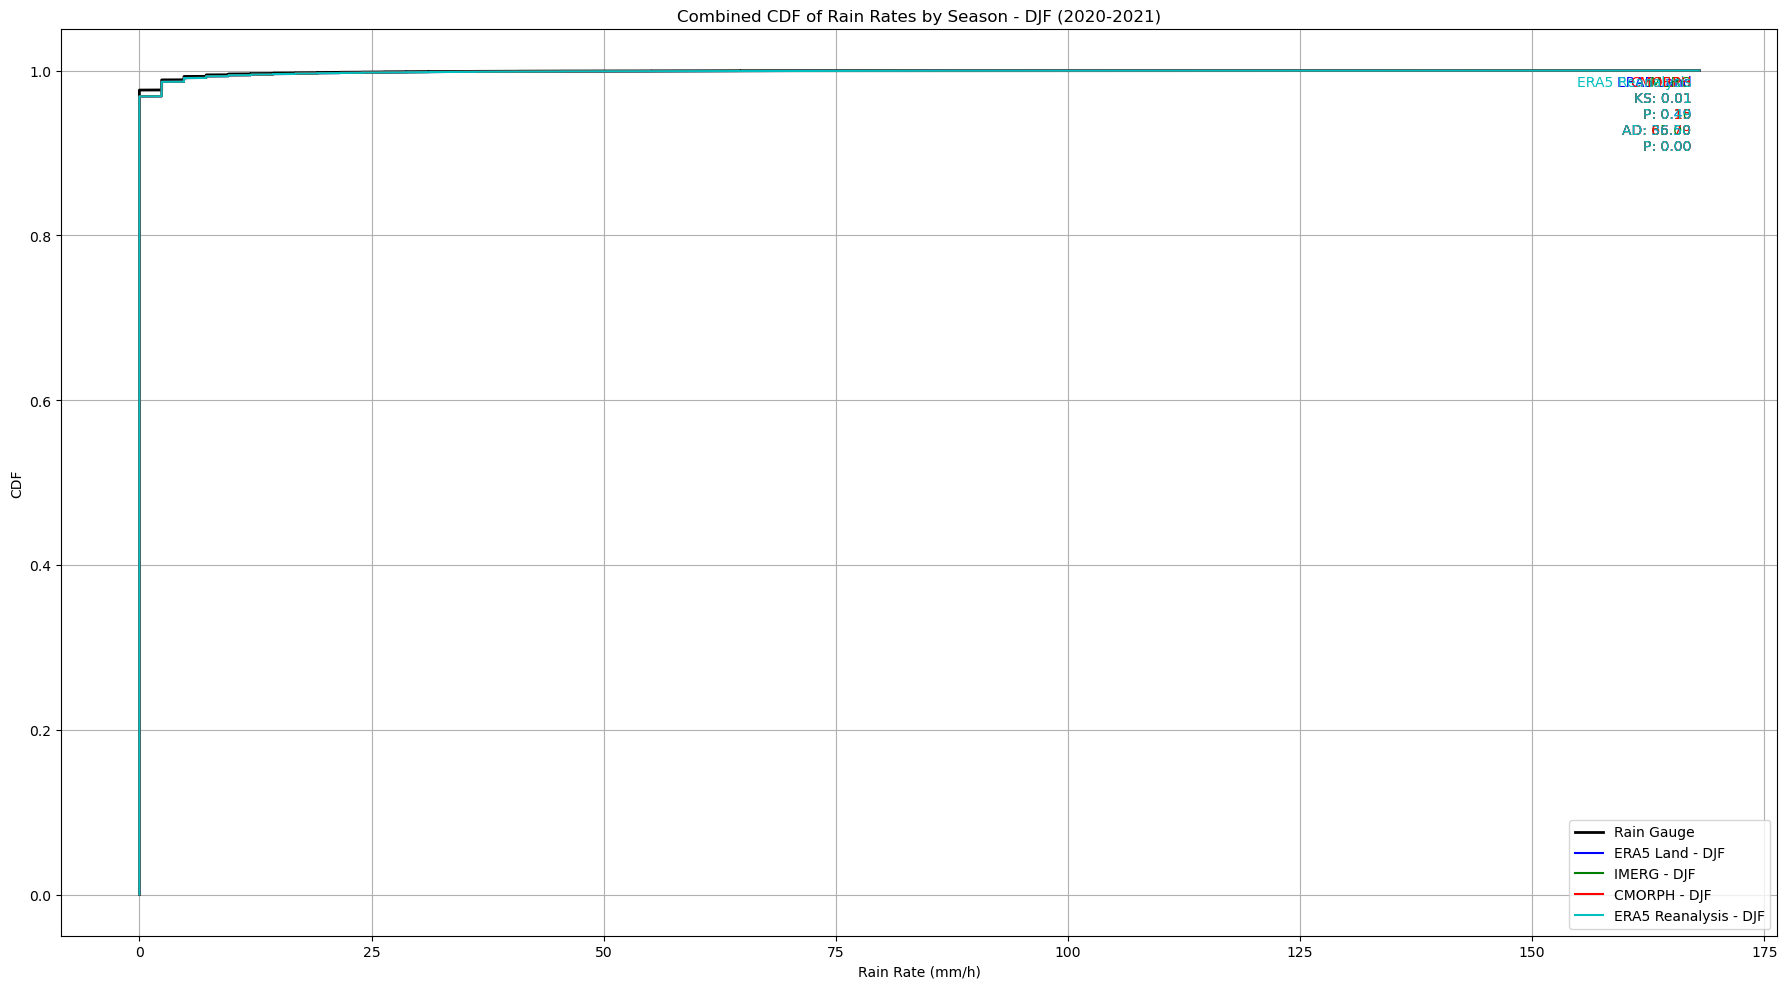

Statistics for Combined Data - DJF (2020-2021):
ERA5 Land - KS Statistic: 0.0077, KS P-Value: 0.4877, AD Statistic: 36.4976, AD P-Value: 0.0010
IMERG - KS Statistic: 0.0076, KS P-Value: 0.1637, AD Statistic: 64.9969, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0077, KS P-Value: 0.1527, AD Statistic: 66.7930, AD P-Value: 0.0010
ERA5 Reanalysis - KS Statistic: 0.0077, KS P-Value: 0.4877, AD Statistic: 36.4976, AD P-Value: 0.0010
ERA5 Land - MAM Probability of 20mm/h rain: 0.0040
IMERG - MAM Probability of 20mm/h rain: 0.0040
CMORPH - MAM Probability of 20mm/h rain: 0.0040
ERA5 Reanalysis - MAM Probability of 20mm/h rain: 0.0040


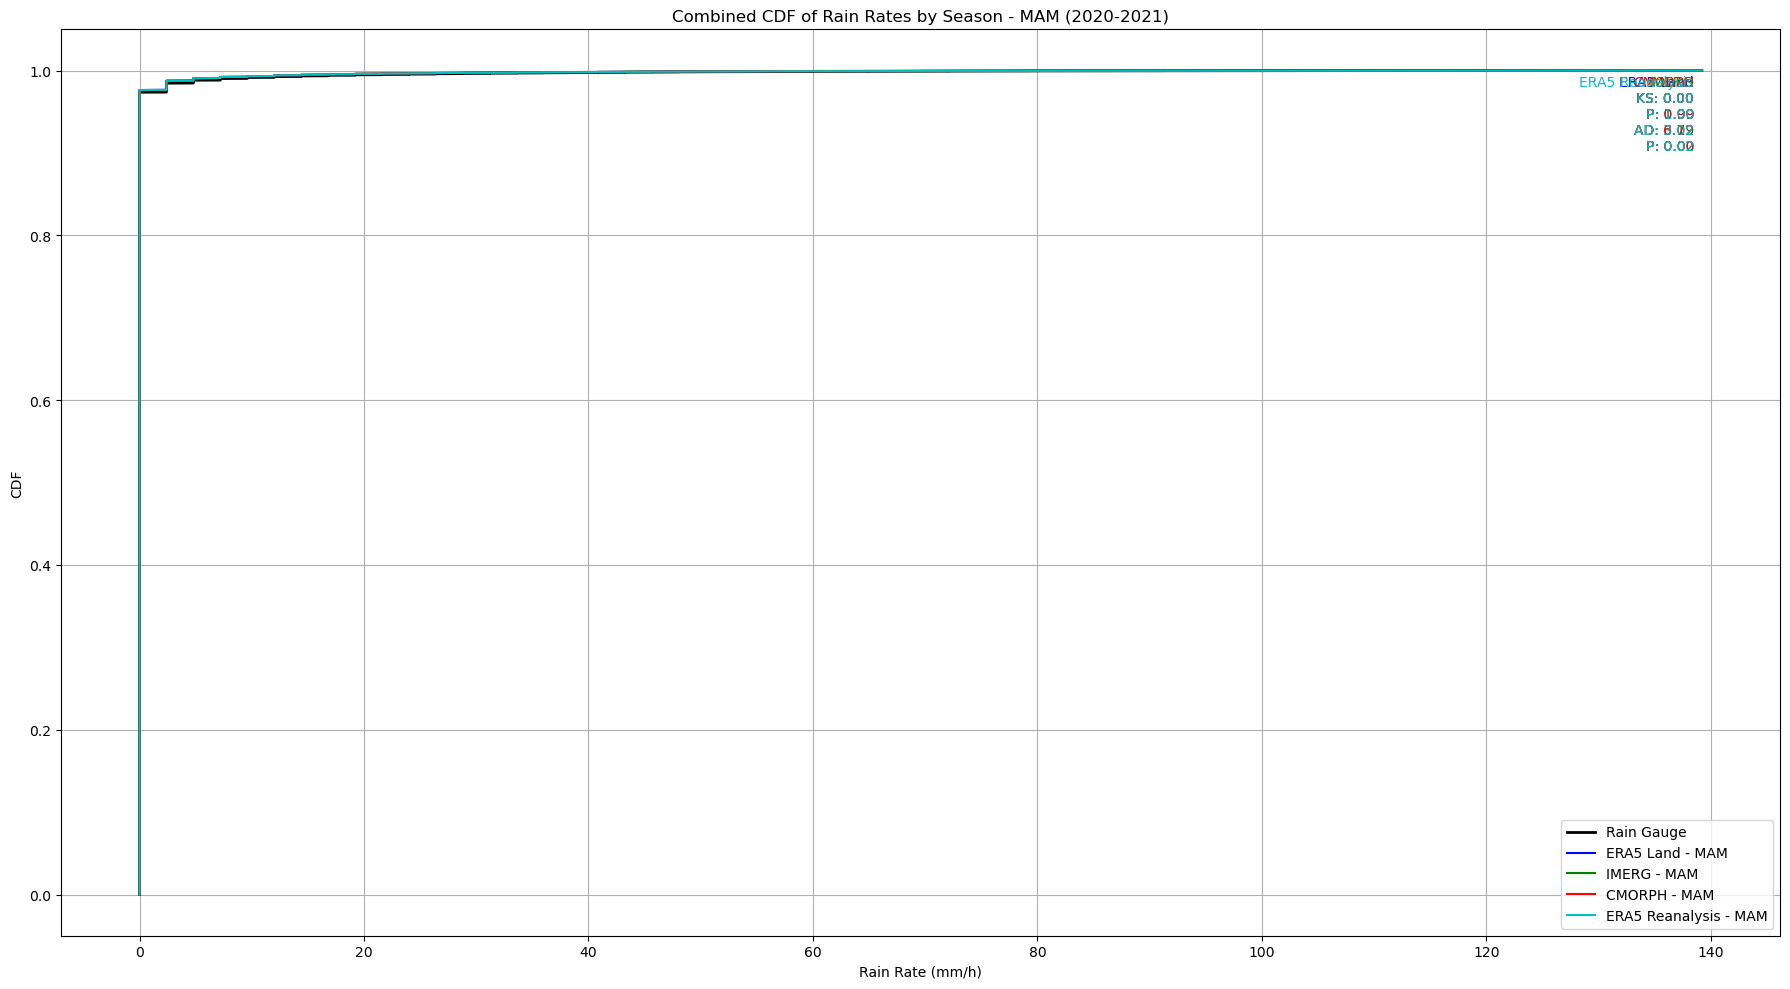

Statistics for Combined Data - MAM (2020-2021):
ERA5 Land - KS Statistic: 0.0029, KS P-Value: 1.0000, AD Statistic: 3.0209, AD P-Value: 0.0191
IMERG - KS Statistic: 0.0029, KS P-Value: 0.9907, AD Statistic: 6.7863, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0029, KS P-Value: 0.9892, AD Statistic: 6.1155, AD P-Value: 0.0014
ERA5 Reanalysis - KS Statistic: 0.0029, KS P-Value: 1.0000, AD Statistic: 3.0235, AD P-Value: 0.0191
ERA5 Land - JJA Probability of 20mm/h rain: 0.0034
IMERG - JJA Probability of 20mm/h rain: 0.0034
CMORPH - JJA Probability of 20mm/h rain: 0.0034
ERA5 Reanalysis - JJA Probability of 20mm/h rain: 0.0034


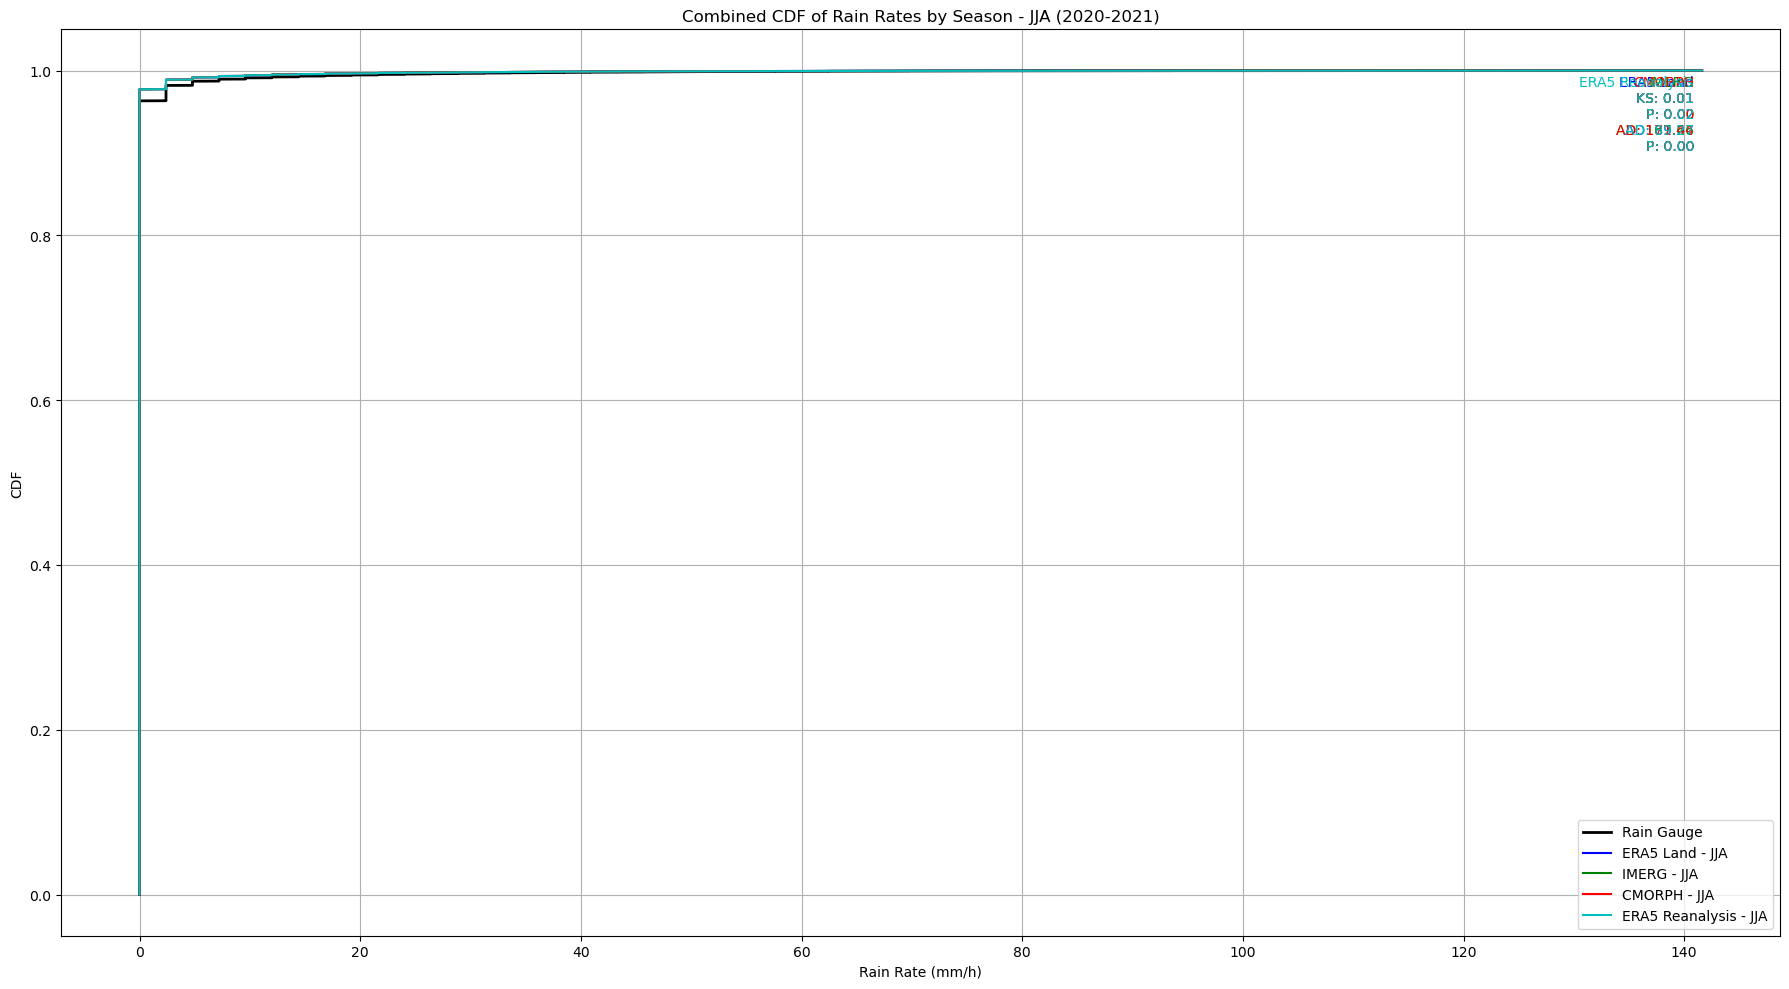

Statistics for Combined Data - JJA (2020-2021):
ERA5 Land - KS Statistic: 0.0141, KS P-Value: 0.0161, AD Statistic: 89.2690, AD P-Value: 0.0010
IMERG - KS Statistic: 0.0140, KS P-Value: 0.0003, AD Statistic: 167.6643, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0141, KS P-Value: 0.0003, AD Statistic: 171.4356, AD P-Value: 0.0010
ERA5 Reanalysis - KS Statistic: 0.0141, KS P-Value: 0.0161, AD Statistic: 89.2702, AD P-Value: 0.0010
ERA5 Land - SON Probability of 20mm/h rain: 0.0042
IMERG - SON Probability of 20mm/h rain: 0.0042
CMORPH - SON Probability of 20mm/h rain: 0.0042
ERA5 Reanalysis - SON Probability of 20mm/h rain: 0.0042


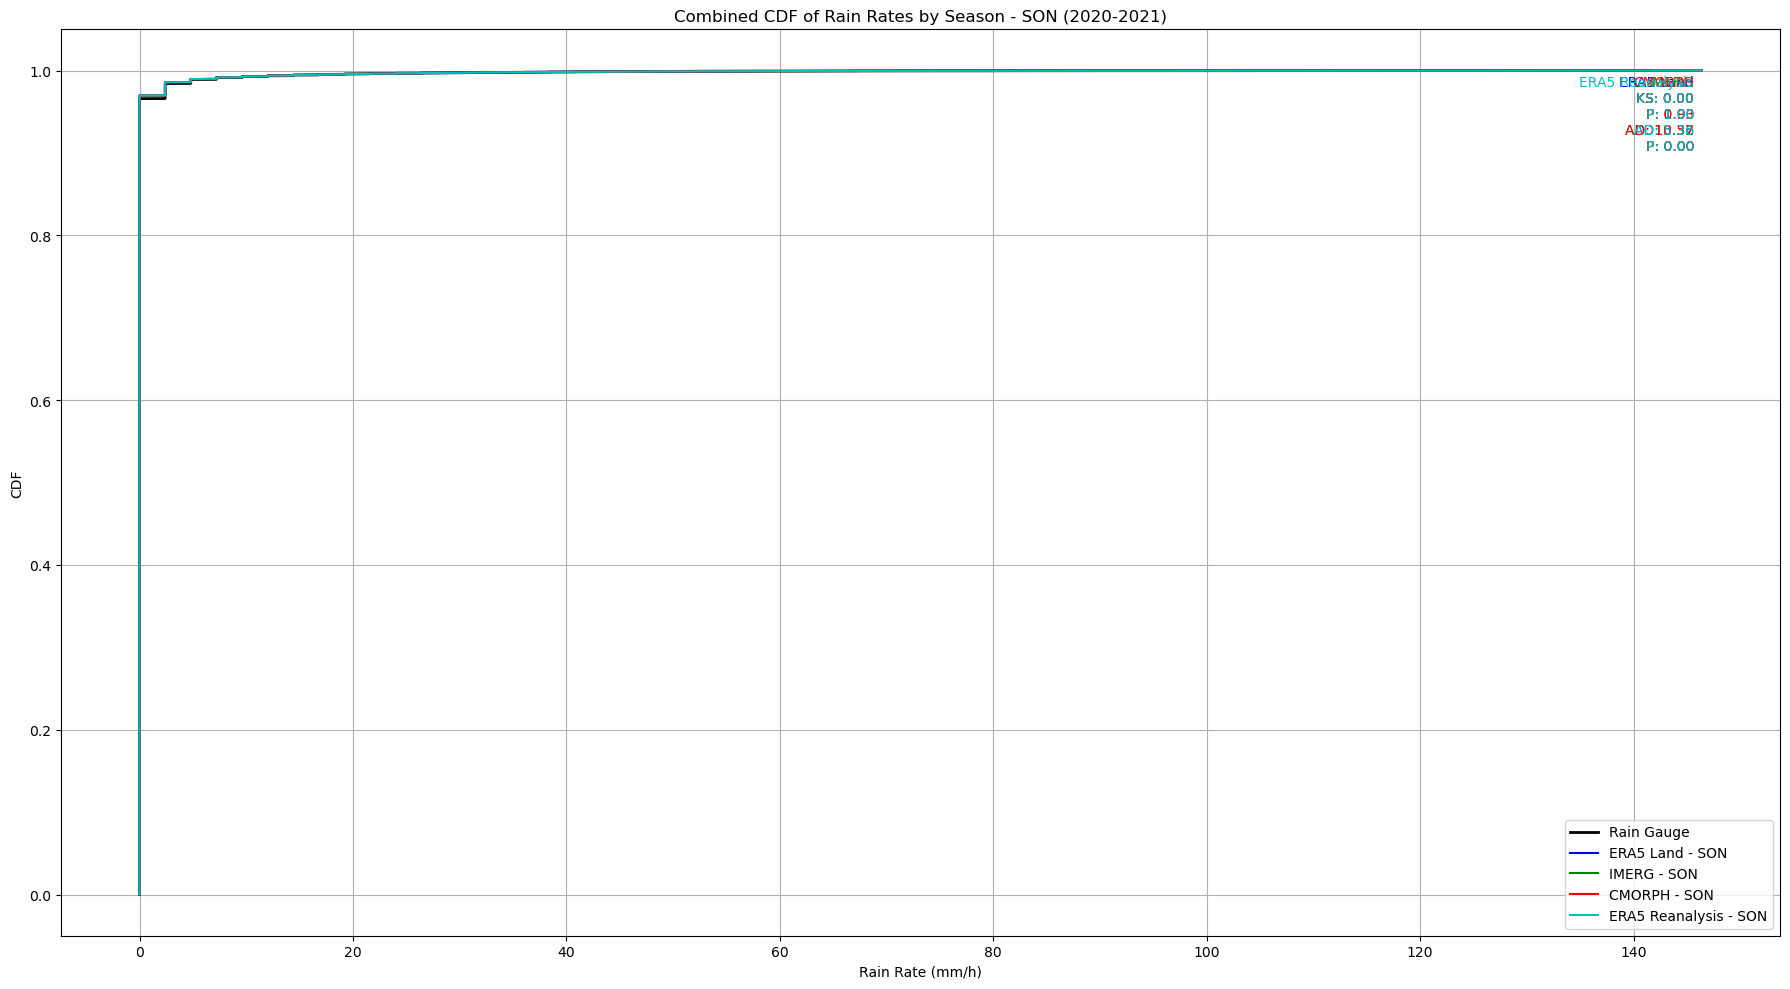

Statistics for Combined Data - SON (2020-2021):
ERA5 Land - KS Statistic: 0.0038, KS P-Value: 0.9957, AD Statistic: 5.3567, AD P-Value: 0.0026
IMERG - KS Statistic: 0.0036, KS P-Value: 0.9311, AD Statistic: 10.3203, AD P-Value: 0.0010
CMORPH - KS Statistic: 0.0037, KS P-Value: 0.9256, AD Statistic: 10.5678, AD P-Value: 0.0010
ERA5 Reanalysis - KS Statistic: 0.0038, KS P-Value: 0.9957, AD Statistic: 5.3573, AD P-Value: 0.0026


In [31]:
# Combine all corrected data for validation
corrected_combined_2020_2021 = pd.concat([rain_gauge_2020_2021, ERA5_Land_corrected, IMERG_corrected, CMORPH_corrected, ERA5_Reanalysis_corrected])
print(corrected_combined_2020_2021)
# Function to calculate combined CDF and probability for 20mm/h rain
def calculate_combined_cdf(data):
    combined_data = data[['Tengah', 'Changi', 'Choa Chu Kang']].values.flatten()
    sorted_data = np.sort(combined_data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    index_20mm = np.searchsorted(sorted_data, 20)
    if index_20mm >= len(sorted_data):
        probability = 0.0
    else:
        probability = 1 - cdf[index_20mm]
    return cdf, sorted_data, probability

# Function to plot combined CDF for each dataset and season, and perform K-S and Anderson-Darling tests
def plot_combined_cdf_and_stats(season):
    plt.figure(figsize=(18, 10))
    datasets = ['Rain Gauge', 'ERA5 Land', 'IMERG', 'CMORPH', 'ERA5 Reanalysis']
    colors = ['k', 'b', 'g', 'r', 'c']
    rain_gauge_data = corrected_combined_2020_2021[(corrected_combined_2020_2021['Dataset'] == 'Rain Gauge') & (corrected_combined_2020_2021['Season'] == season)]
    gauge_cdf, gauge_sorted_data, _ = calculate_combined_cdf(rain_gauge_data)
    plt.plot(gauge_sorted_data, gauge_cdf, label='Rain Gauge', color='k', linestyle='-', linewidth=2)
    
    stats_results = []
    for dataset, color in zip(datasets[1:], colors[1:]):
        data = corrected_combined_2020_2021[(corrected_combined_2020_2021['Dataset'] == dataset) & (corrected_combined_2020_2021['Season'] == season)]
        cdf, sorted_data, probability = calculate_combined_cdf(data)
        plt.plot(sorted_data, cdf, label=f'{dataset} - {season}', color=color)
        print(f'{dataset} - {season} Probability of 20mm/h rain: {probability:.4f}')
        
        ks_statistic, ks_p_value = kstest(sorted_data, gauge_sorted_data)
        ad_result = anderson_ksamp([sorted_data, gauge_sorted_data])
        stats_results.append((dataset, ks_statistic, ks_p_value, ad_result.statistic, ad_result.significance_level))
        
        plt.text(0.95, 0.95, f'{dataset}\nKS: {ks_statistic:.2f}\nP: {ks_p_value:.2f}\nAD: {ad_result.statistic:.2f}\nP: {ad_result.significance_level:.2f}', 
                 horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color=color)
    
    plt.xlabel('Rain Rate (mm/h)')
    plt.ylabel('CDF')
    plt.title(f'Combined CDF of Rain Rates by Season - {season} (2020-2021)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print out the statistics for each dataset
    print(f'Statistics for Combined Data - {season} (2020-2021):')
    for result in stats_results:
        dataset, ks_statistic, ks_p_value, ad_statistic, ad_p_value = result
        print(f'{dataset} - KS Statistic: {ks_statistic:.4f}, KS P-Value: {ks_p_value:.4f}, AD Statistic: {ad_statistic:.4f}, AD P-Value: {ad_p_value:.4f}')

# Plot combined CDF and statistics for each season
seasons = ['DJF', 'MAM', 'JJA', 'SON']
for season in seasons:
    plot_combined_cdf_and_stats(season)


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ibicus.debias import Debiaser

# Define the season to month mapping function
def season_to_month(season):
    return {'DJF': 1, 'MAM': 4, 'JJA': 7, 'SON': 10}.get(season, 1)

# Define a function to process and extract relevant columns for each dataset
def extract_relevant_columns(data, dataset_name):
    data = data.dropna(subset=['Tengah', 'Changi', 'Choa Chu Kang'])
    data['Year'] = data['Season_Year'].str[-4:].astype(int)
    data['Season'] = data['Season_Year'].str[:3]
    data['Month'] = data['Season'].apply(season_to_month)
    data['Datetime'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
    data['Dataset'] = dataset_name
    return data[['Datetime', 'Tengah', 'Changi', 'Choa Chu Kang', 'Dataset']]

# Extract relevant columns from each dataset
rain_gauge_relevant = extract_relevant_columns(rain_gauge_filtered, 'Rain Gauge')
ERA5_Land_relevant = extract_relevant_columns(ERA5_Land_filtered, 'ERA5 Land')
IMERG_relevant = extract_relevant_columns(IMERG_filtered, 'IMERG')
CMORPH_relevant = extract_relevant_columns(CMORPH_filtered, 'CMORPH')
ERA5_Reanalysis_relevant = extract_relevant_columns(ERA5_Reanalysis_filtered, 'ERA5 Reanalysis')

# Apply the required multipliers
ERA5_Land_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
ERA5_Reanalysis_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 1000
rain_gauge_relevant[['Tengah', 'Changi', 'Choa Chu Kang']] *= 12

# Filter data to split into two sets
def filter_years(data, start_year, end_year):
    return data[(data['Year'] >= start_year) & (data['Year'] <= end_year)]
'''
# Split data into 2016-2020 and 2020-2021
rain_gauge_2016_2020 = filter_years(rain_gauge_relevant, 2016, 2020)
rain_gauge_2020_2021 = filter_years(rain_gauge_relevant, 2020, 2021)
ERA5_Land_2016_2020 = filter_years(ERA5_Land_relevant, 2016, 2020)
ERA5_Land_2020_2021 = filter_years(ERA5_Land_relevant, 2020, 2021)
IMERG_2016_2020 = filter_years(IMERG_relevant, 2016, 2020)
IMERG_2020_2021 = filter_years(IMERG_relevant, 2020, 2021)
CMORPH_2016_2020 = filter_years(CMORPH_relevant, 2016, 2020)
CMORPH_2020_2021 = filter_years(CMORPH_relevant, 2020, 2021)
ERA5_Reanalysis_2016_2020 = filter_years(ERA5_Reanalysis_relevant, 2016, 2020)
ERA5_Reanalysis_2020_2021 = filter_years(ERA5_Reanalysis_relevant, 2020, 2021)
'''
# Function to apply IBICUS debiaser
def apply_ibicus(observed, simulated, location):
    debiaser = Debiaser(observed, simulated)
    corrected_simulated = debiaser.correct()
    return corrected_simulated

# Apply IBICUS for bias correction on 2016-2020 data
def apply_bias_correction_ibicus(observed_data, simulated_data):
    corrected_data = simulated_data.copy()
    for location in ['Tengah', 'Changi', 'Choa Chu Kang']:
        observed = observed_data[['Datetime', location]].dropna()
        simulated = simulated_data[['Datetime', location]].dropna()
        corrected = apply_ibicus(observed[location].values, simulated[location].values, location)
        corrected_data.loc[simulated_data['Datetime'].isin(simulated['Datetime']), location] = corrected
    return corrected_data

ERA5_Land_corrected = apply_bias_correction_ibicus(rain_gauge_2016_2020, ERA5_Land_2020_2021)
IMERG_corrected = apply_bias_correction_ibicus(rain_gauge_2016_2020, IMERG_2020_2021)
CMORPH_corrected = apply_bias_correction_ibicus(rain_gauge_2016_2020, CMORPH_2020_2021)
ERA5_Reanalysis_corrected = apply_bias_correction_ibicus(rain_gauge_2016_2020, ERA5_Reanalysis_2020_2021)

# Combine all corrected data for validation
corrected_combined_2020_2021 = pd.concat([rain_gauge_2020_2021, ERA5_Land_corrected, IMERG_corrected, CMORPH_corrected, ERA5_Reanalysis_corrected])

# Function to calculate combined CDF and probability for 20mm/h rain
def calculate_combined_cdf(data):
    combined_data = data[['Tengah', 'Changi', 'Choa Chu Kang']].values.flatten()
    sorted_data = np.sort(combined_data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    index_20mm = np.searchsorted(sorted_data, 20)
    if index_20mm >= len(sorted_data):
        probability = 0.0
    else:
        probability = 1 - cdf[index_20mm]
    return cdf, sorted_data, probability

# Function to plot combined CDF for each dataset and season, and perform K-S and Anderson-Darling tests
def plot_combined_cdf_and_stats(season):
    plt.figure(figsize=(18, 10))
    datasets = ['Rain Gauge', 'ERA5 Land', 'IMERG', 'CMORPH', 'ERA5 Reanalysis']
    colors = ['k', 'b', 'g', 'r', 'c']
    rain_gauge_data = corrected_combined_2020_2021[(corrected_combined_2020_2021['Dataset'] == 'Rain Gauge') & (corrected_combined_2020_2021['Season'] == season)]
    gauge_cdf, gauge_sorted_data, _ = calculate_combined_cdf(rain_gauge_data)
    plt.plot(gauge_sorted_data, gauge_cdf, label='Rain Gauge', color='k', linestyle='-', linewidth=2)
    
    stats_results = []
    for dataset, color in zip(datasets[1:], colors[1:]):
        data = corrected_combined_2020_2021[(corrected_combined_2020_2021['Dataset'] == dataset) & (corrected_combined_2020_2021['Season'] == season)]
        cdf, sorted_data, probability = calculate_combined_cdf(data)
        plt.plot(sorted_data, cdf, label=f'{dataset} - {season}', color=color)
        print(f'{dataset} - {season} Probability of 20mm/h rain: {probability:.4f}')
        
        ks_statistic, ks_p_value = kstest(sorted_data, gauge_sorted_data)
        ad_result = anderson_ksamp([sorted_data, gauge_sorted_data])
        stats_results.append((dataset, ks_statistic, ks_p_value, ad_result.statistic, ad_result.significance_level))
        
        plt.text(0.95, 0.95, f'{dataset}\nKS: {ks_statistic:.2f}\nP: {ks_p_value:.2f}\nAD: {ad_result.statistic:.2f}\nP: {ad_result.significance_level:.2f}', 
                 horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color=color)
    
    plt.xlabel('Rain Rate (mm/h)')
    plt.ylabel('CDF')
    plt.title(f'Combined CDF of Rain Rates by Season - {season} (2020-2021)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print out the statistics for each dataset
    print(f'Statistics for Combined Data - {season} (2020-2021):')
    for result in stats_results:
        dataset, ks_statistic, ks_p_value, ad_statistic, ad_p_value = result
        print(f'{dataset} - KS Statistic: {ks_statistic:.4f}, KS P-Value: {ks_p_value:.4f}, AD Statistic: {ad_statistic:.4f}, AD P-Value: {ad_p_value:.4f}')

# Plot combined CDF and statistics for each season
seasons = ['DJF', 'MAM', 'JJA', 'SON']
for season in seasons:
    plot_combined_cdf_and_stats(season)


KeyError: "['Datetime'] not in index"